<a href="https://www.kaggle.com/code/alejandravillarreal/cereals-nutritional-eda-using-r?scriptVersionId=193124552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 80 Cereals - Nutrition data on 80 cereal products
## Exploratory Data Analysis - R 

Hello everyone, this is an Exploratory Data analysis using **R programing language** and **ggplot2**

**Credits:**
* 80 Cereals: https://www.kaggle.com/datasets/crawford/80-cereals
* Chris Crawford (Dataset Grandmaster): https://www.kaggle.com/crawford

# Libraries

In [1]:
# Visualizations
library(hrbrthemes)
library(ggthemes)
library(ggplot2)
library(cowplot)
# Data Manipulation
library(dplyr)

# Statistics
library(DescTools)


Attaching package: ‘cowplot’




The following object is masked from ‘package:ggthemes’:

    theme_map





Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Import data

## About the data

*This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset.*

* **Pregnancies**: Number of pregnancies
* **Glucose**: Glucose level in blood
* **BloodPressure**: Blood pressure measurement
* **SkinThickness**: Thickness of the skin
* **Insulin**: Insulin level in blood
* **BMI**: Body mass index
* **DiabetesPedigreeFunction**: Diabetes percentage
* **Age**: Patient age
* **Outcome**: final result 1 is Yes and 0 is No

In [2]:
data <- read.csv("../input/80-cereals/cereal.csv", stringsAsFactors = FALSE)
# Viewing the first 6 DataFrame records
head(data, 6)

name                      mfr type calories protein fat sodium fiber carbo
1 100% Bran                 N   C     70      4       1   130    10.0   5.0 
2 100% Natural Bran         Q   C    120      3       5    15     2.0   8.0 
3 All-Bran                  K   C     70      4       1   260     9.0   7.0 
4 All-Bran with Extra Fiber K   C     50      4       0   140    14.0   8.0 
5 Almond Delight            R   C    110      2       2   200     1.0  14.0 
6 Apple Cinnamon Cheerios   G   C    110      2       2   180     1.5  10.5 
  sugars potass vitamins shelf weight cups rating  
1  6     280    25       3     1      0.33 68.40297
2  8     135     0       3     1      1.00 33.98368
3  5     320    25       3     1      0.33 59.42551
4  0     330    25       3     1      0.50 93.70491
5  8      -1    25       3     1      0.75 34.38484
6 10      70    25       1     1      0.75 29.50954

# Data transformations

* Removing negative data
* Transforming the data just to be fair and compare all the cereals by cup.

In [3]:
summary(data)

     name               mfr                type              calories    
 Length:77          Length:77          Length:77          Min.   : 50.0  
 Class :character   Class :character   Class :character   1st Qu.:100.0  
 Mode  :character   Mode  :character   Mode  :character   Median :110.0  
                                                          Mean   :106.9  
                                                          3rd Qu.:110.0  
                                                          Max.   :160.0  
    protein           fat            sodium          fiber       
 Min.   :1.000   Min.   :0.000   Min.   :  0.0   Min.   : 0.000  
 1st Qu.:2.000   1st Qu.:0.000   1st Qu.:130.0   1st Qu.: 1.000  
 Median :3.000   Median :1.000   Median :180.0   Median : 2.000  
 Mean   :2.545   Mean   :1.013   Mean   :159.7   Mean   : 2.152  
 3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.:210.0   3rd Qu.: 3.000  
 Max.   :6.000   Max.   :5.000   Max.   :320.0   Max.   :14.000  
     carbo          

## Removing negative values

I personaly think the **negative** nutritional values can't be posible, but if I'm worng please let me know 😉

In [4]:
data <- subset(data,carbo >= 0)
data <- subset(data,sugars >= 0)
data <- subset(data,potass >= 0)
summary(data)

     name               mfr                type              calories  
 Length:74          Length:74          Length:74          Min.   : 50  
 Class :character   Class :character   Class :character   1st Qu.:100  
 Mode  :character   Mode  :character   Mode  :character   Median :110  
                                                          Mean   :107  
                                                          3rd Qu.:110  
                                                          Max.   :160  
    protein           fat        sodium          fiber            carbo      
 Min.   :1.000   Min.   :0   Min.   :  0.0   Min.   : 0.000   Min.   : 5.00  
 1st Qu.:2.000   1st Qu.:0   1st Qu.:135.0   1st Qu.: 0.250   1st Qu.:12.00  
 Median :2.500   Median :1   Median :180.0   Median : 2.000   Median :14.50  
 Mean   :2.514   Mean   :1   Mean   :162.4   Mean   : 2.176   Mean   :14.73  
 3rd Qu.:3.000   3rd Qu.:1   3rd Qu.:217.5   3rd Qu.: 3.000   3rd Qu.:17.00  
 Max.   :6.000   Max.   :5  

## Converting all portions to a cup 

In [5]:
serving_onecup <- data.frame(cereal = data$name, 
                             calories = round((data$calories/(data$cups*100)*100),2),
                             protein = round((data$protein/(data$cups*100)*100),2),
                             fat = round((data$fat/(data$cups*100)*100),2),
                             carbo = round((data$carbo/(data$cups*100)*100),2),
                             fiber = round((data$fiber/(data$cups*100)*100),2),
                             sugars = round((data$sugars/(data$cups*100)*100),2),
                             potass = round((data$potass/(data$cups*100)*100),2),
                             vitamins = round((data$vitamins/(data$cups*100)*100),2)
                            )
serving_onecup <- serving_onecup[order(serving_onecup$calories, decreasing=TRUE), ]
head(serving_onecup,6)

cereal               calories protein fat  carbo fiber sugars potass
32 Grape-Nuts           440.00   12.00   0.00 68.00 12.00 12.00  360.00
33 Great Grains Pecan   363.64    9.09   9.09 39.39  9.09 12.12  303.03
50 Oatmeal Raisin Crisp 260.00    6.00   4.00 27.00  3.00 20.00  240.00
45 Mueslix Crispy Blend 238.81    4.48   2.99 25.37  4.48 19.40  238.81
13 Clusters             220.00    6.00   4.00 26.00  4.00 14.00  210.00
19 Cracklin' Oat Bran   220.00    6.00   6.00 20.00  8.00 14.00  320.00
   vitamins
32 100.00  
33  75.76  
50  50.00  
45  37.31  
13  50.00  
19  50.00

In [6]:
summary(serving_onecup)

    cereal             calories        protein            fat       
 Length:74          Min.   : 50.0   Min.   : 0.750   Min.   :0.000  
 Class :character   1st Qu.:110.0   1st Qu.: 2.000   1st Qu.:0.000  
 Mode  :character   Median :134.3   Median : 3.000   Median :1.000  
                    Mean   :143.9   Mean   : 3.587   Mean   :1.425  
                    3rd Qu.:160.0   3rd Qu.: 4.480   3rd Qu.:2.000  
                    Max.   :440.0   Max.   :12.120   Max.   :9.090  
     carbo           fiber            sugars          potass     
 Min.   : 8.00   Min.   : 0.000   Min.   : 0.00   Min.   : 15.0  
 1st Qu.:15.00   1st Qu.: 0.250   1st Qu.: 3.00   1st Qu.: 47.5  
 Median :17.41   Median : 2.000   Median :11.00   Median : 95.0  
 Mean   :19.32   Mean   : 3.657   Mean   : 9.45   Mean   :152.7  
 3rd Qu.:21.83   3rd Qu.: 4.000   3rd Qu.:13.40   3rd Qu.:205.2  
 Max.   :68.00   Max.   :30.300   Max.   :20.90   Max.   :969.7  
    vitamins     
 Min.   :  0.00  
 1st Qu.: 25.00  
 

# Exploring the data

## Calories per cup

In [7]:
#sorting by calories
serving_onecup <- serving_onecup[order(serving_onecup$calories, decreasing=TRUE), ]
head(serving_onecup,6)

cereal               calories protein fat  carbo fiber sugars potass
32 Grape-Nuts           440.00   12.00   0.00 68.00 12.00 12.00  360.00
33 Great Grains Pecan   363.64    9.09   9.09 39.39  9.09 12.12  303.03
50 Oatmeal Raisin Crisp 260.00    6.00   4.00 27.00  3.00 20.00  240.00
45 Mueslix Crispy Blend 238.81    4.48   2.99 25.37  4.48 19.40  238.81
13 Clusters             220.00    6.00   4.00 26.00  4.00 14.00  210.00
19 Cracklin' Oat Bran   220.00    6.00   6.00 20.00  8.00 14.00  320.00
   vitamins
32 100.00  
33  75.76  
50  50.00  
45  37.31  
13  50.00  
19  50.00

In [8]:
options(repr.plot.width = 20, repr.plot.height = 20)

df <- head(serving_onecup, 15)
top_cal <- ggplot(data = df, mapping = aes(x = cereal, y = calories)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=calories), fill = "red", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 15 cereals with most calories") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

df1 <- tail(serving_onecup, 15)
bot_cal <- ggplot(data = df1, mapping = aes(x = cereal, y = calories)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=calories), fill = "#006400", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 15 cereals with less calories") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


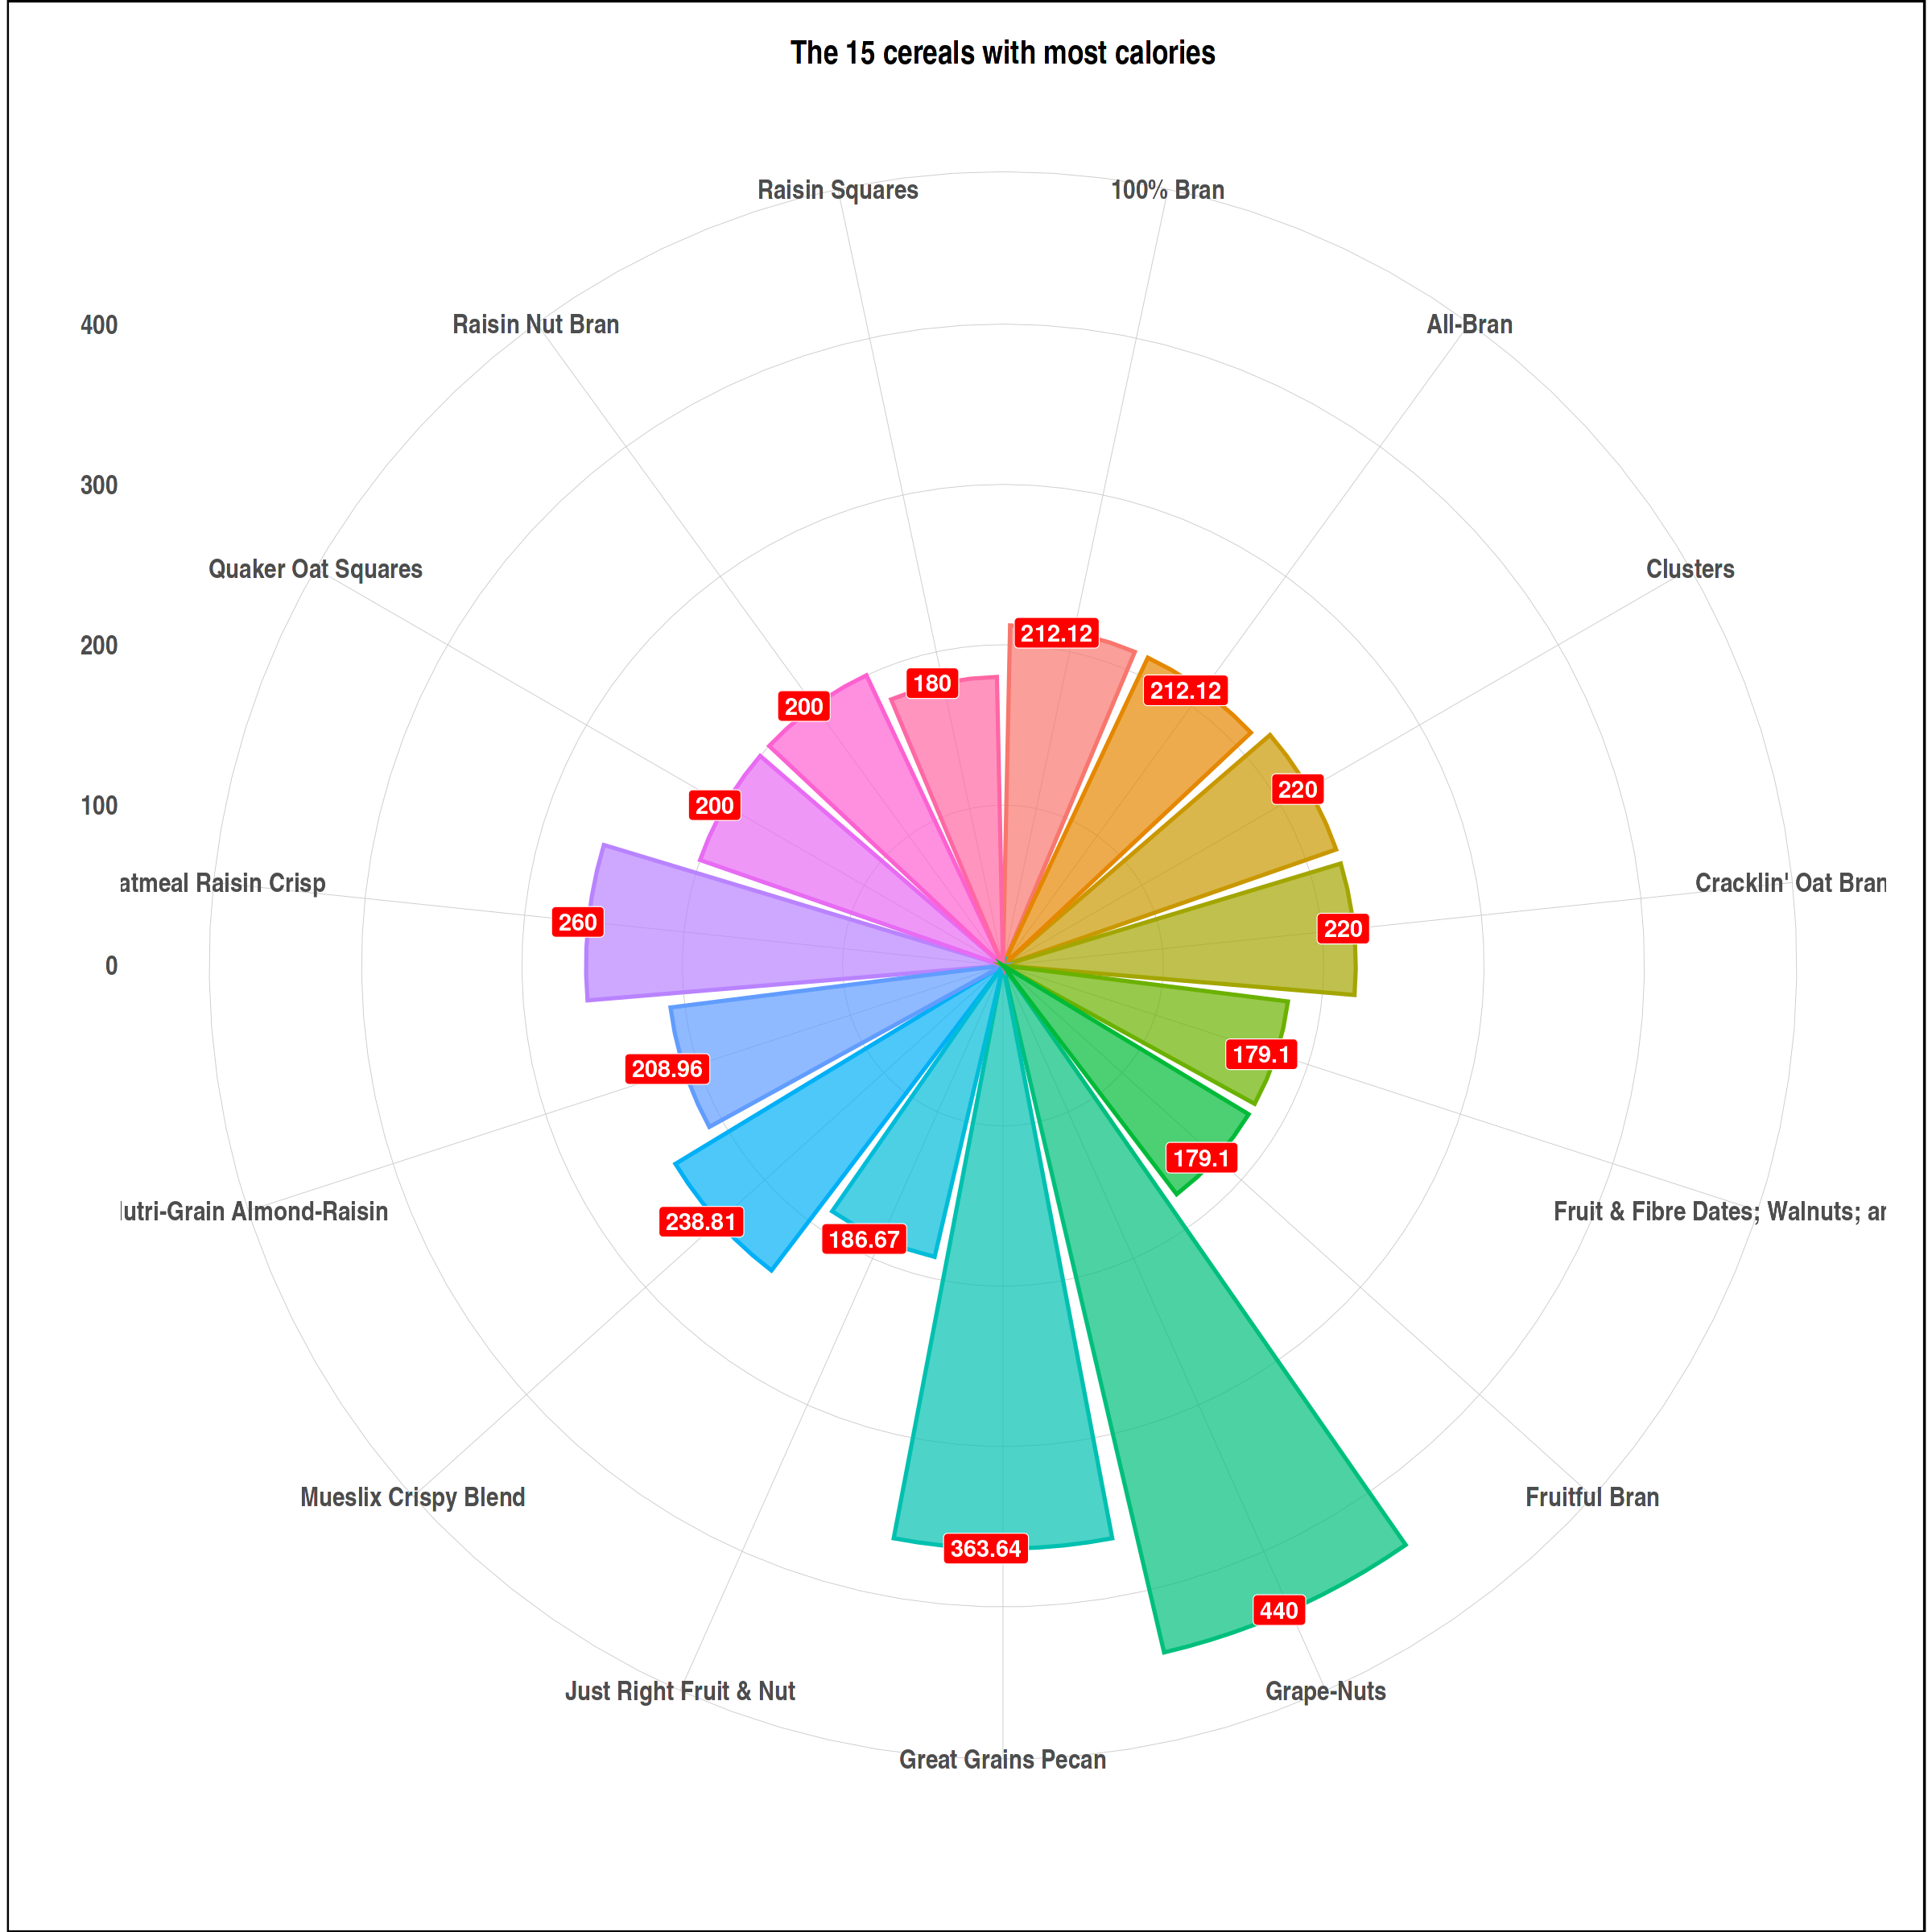

In [9]:
plot(top_cal+ coord_polar())

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


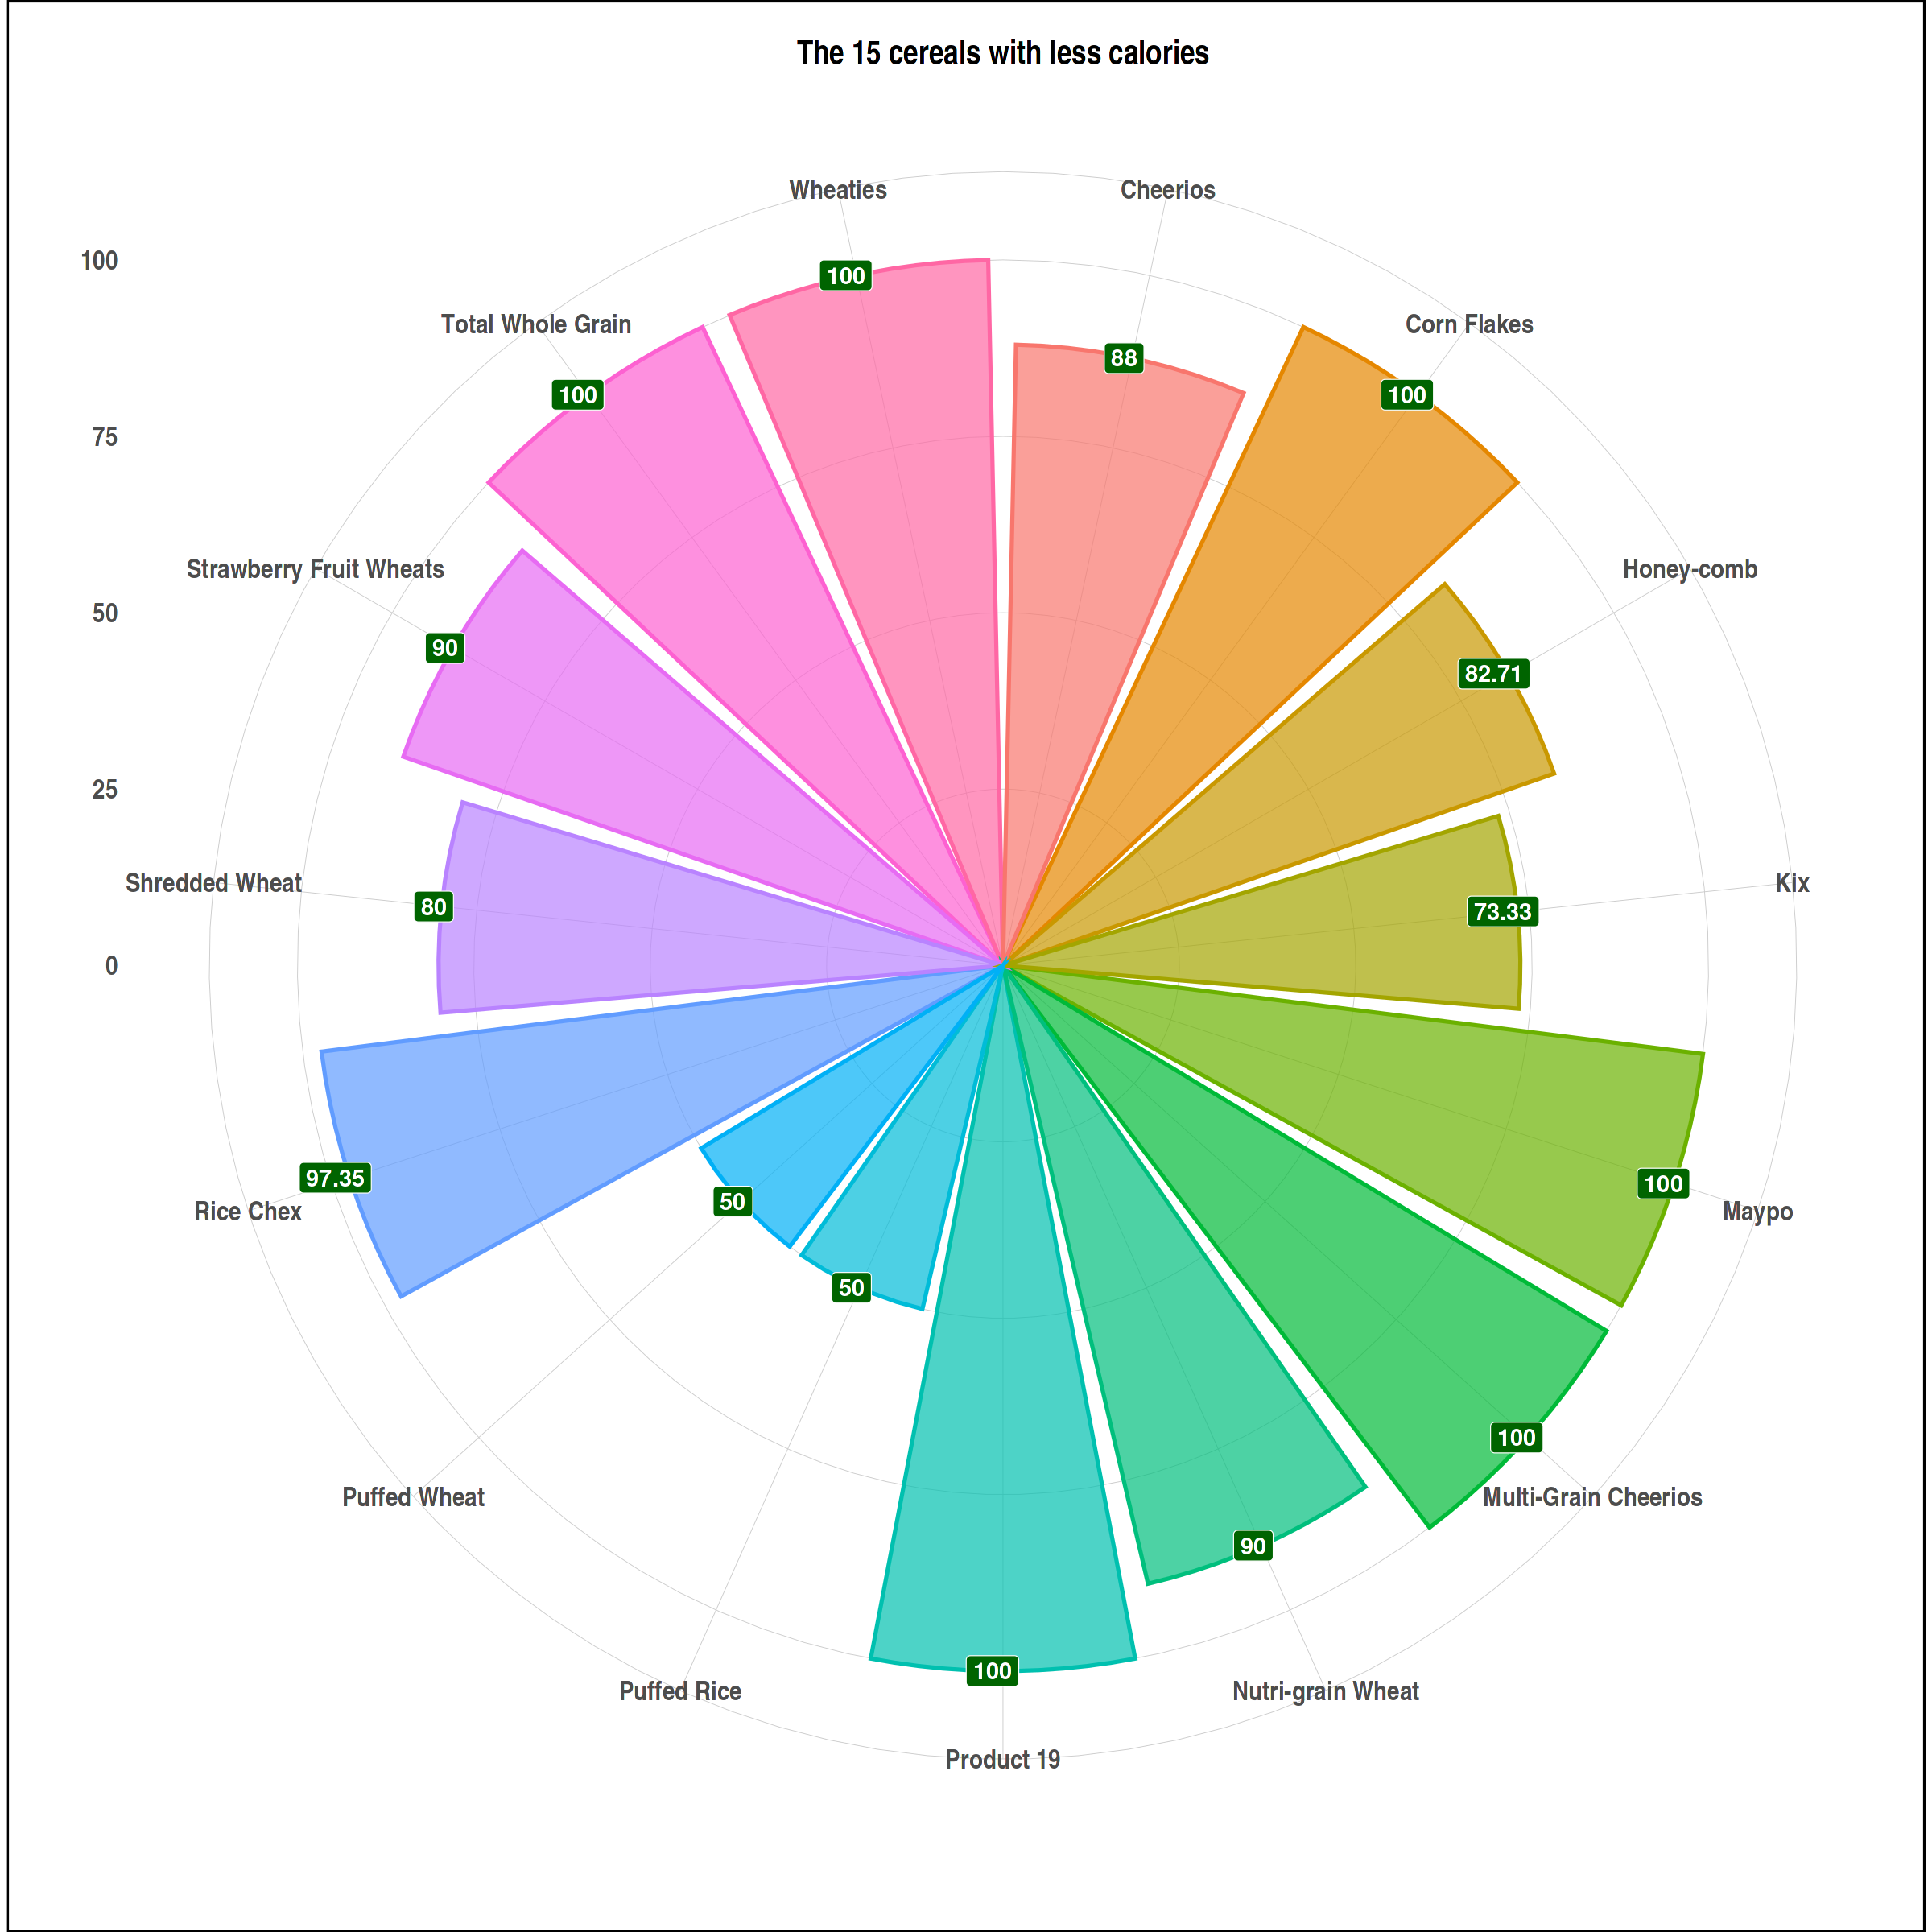

In [10]:
plot(bot_cal+ coord_polar())

## Protein per cup

In [11]:
#sorting by protein
serving_onecup <- serving_onecup[order(serving_onecup$protein, decreasing=TRUE), ]
head(serving_onecup,6)

cereal                    calories protein fat  carbo fiber sugars potass
1  100% Bran                 212.12   12.12   3.03 15.15 30.30 18.18  848.48
3  All-Bran                  212.12   12.12   3.03 21.21 27.27 15.15  969.70
32 Grape-Nuts                440.00   12.00   0.00 68.00 12.00 12.00  360.00
33 Great Grains Pecan        363.64    9.09   9.09 39.39  9.09 12.12  303.03
55 Quaker Oat Squares        200.00    8.00   2.00 28.00  4.00 12.00  220.00
4  All-Bran with Extra Fiber 100.00    8.00   0.00 16.00 28.00  0.00  660.00
   vitamins
1   75.76  
3   75.76  
32 100.00  
33  75.76  
55  50.00  
4   50.00

In [12]:
options(repr.plot.width = 20, repr.plot.height = 20)

df <- head(serving_onecup, 15)
top_protein <- ggplot(data = df, mapping = aes(x = cereal, y = protein)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=protein), fill = "#006400", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("Top 15 high protein cereals per cup.") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

df1 <- tail(serving_onecup, 15)
bottom_protein <- ggplot(data = df1, mapping = aes(x = cereal, y = protein)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=protein), fill = "red", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 15 less protein cereals per cup.") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


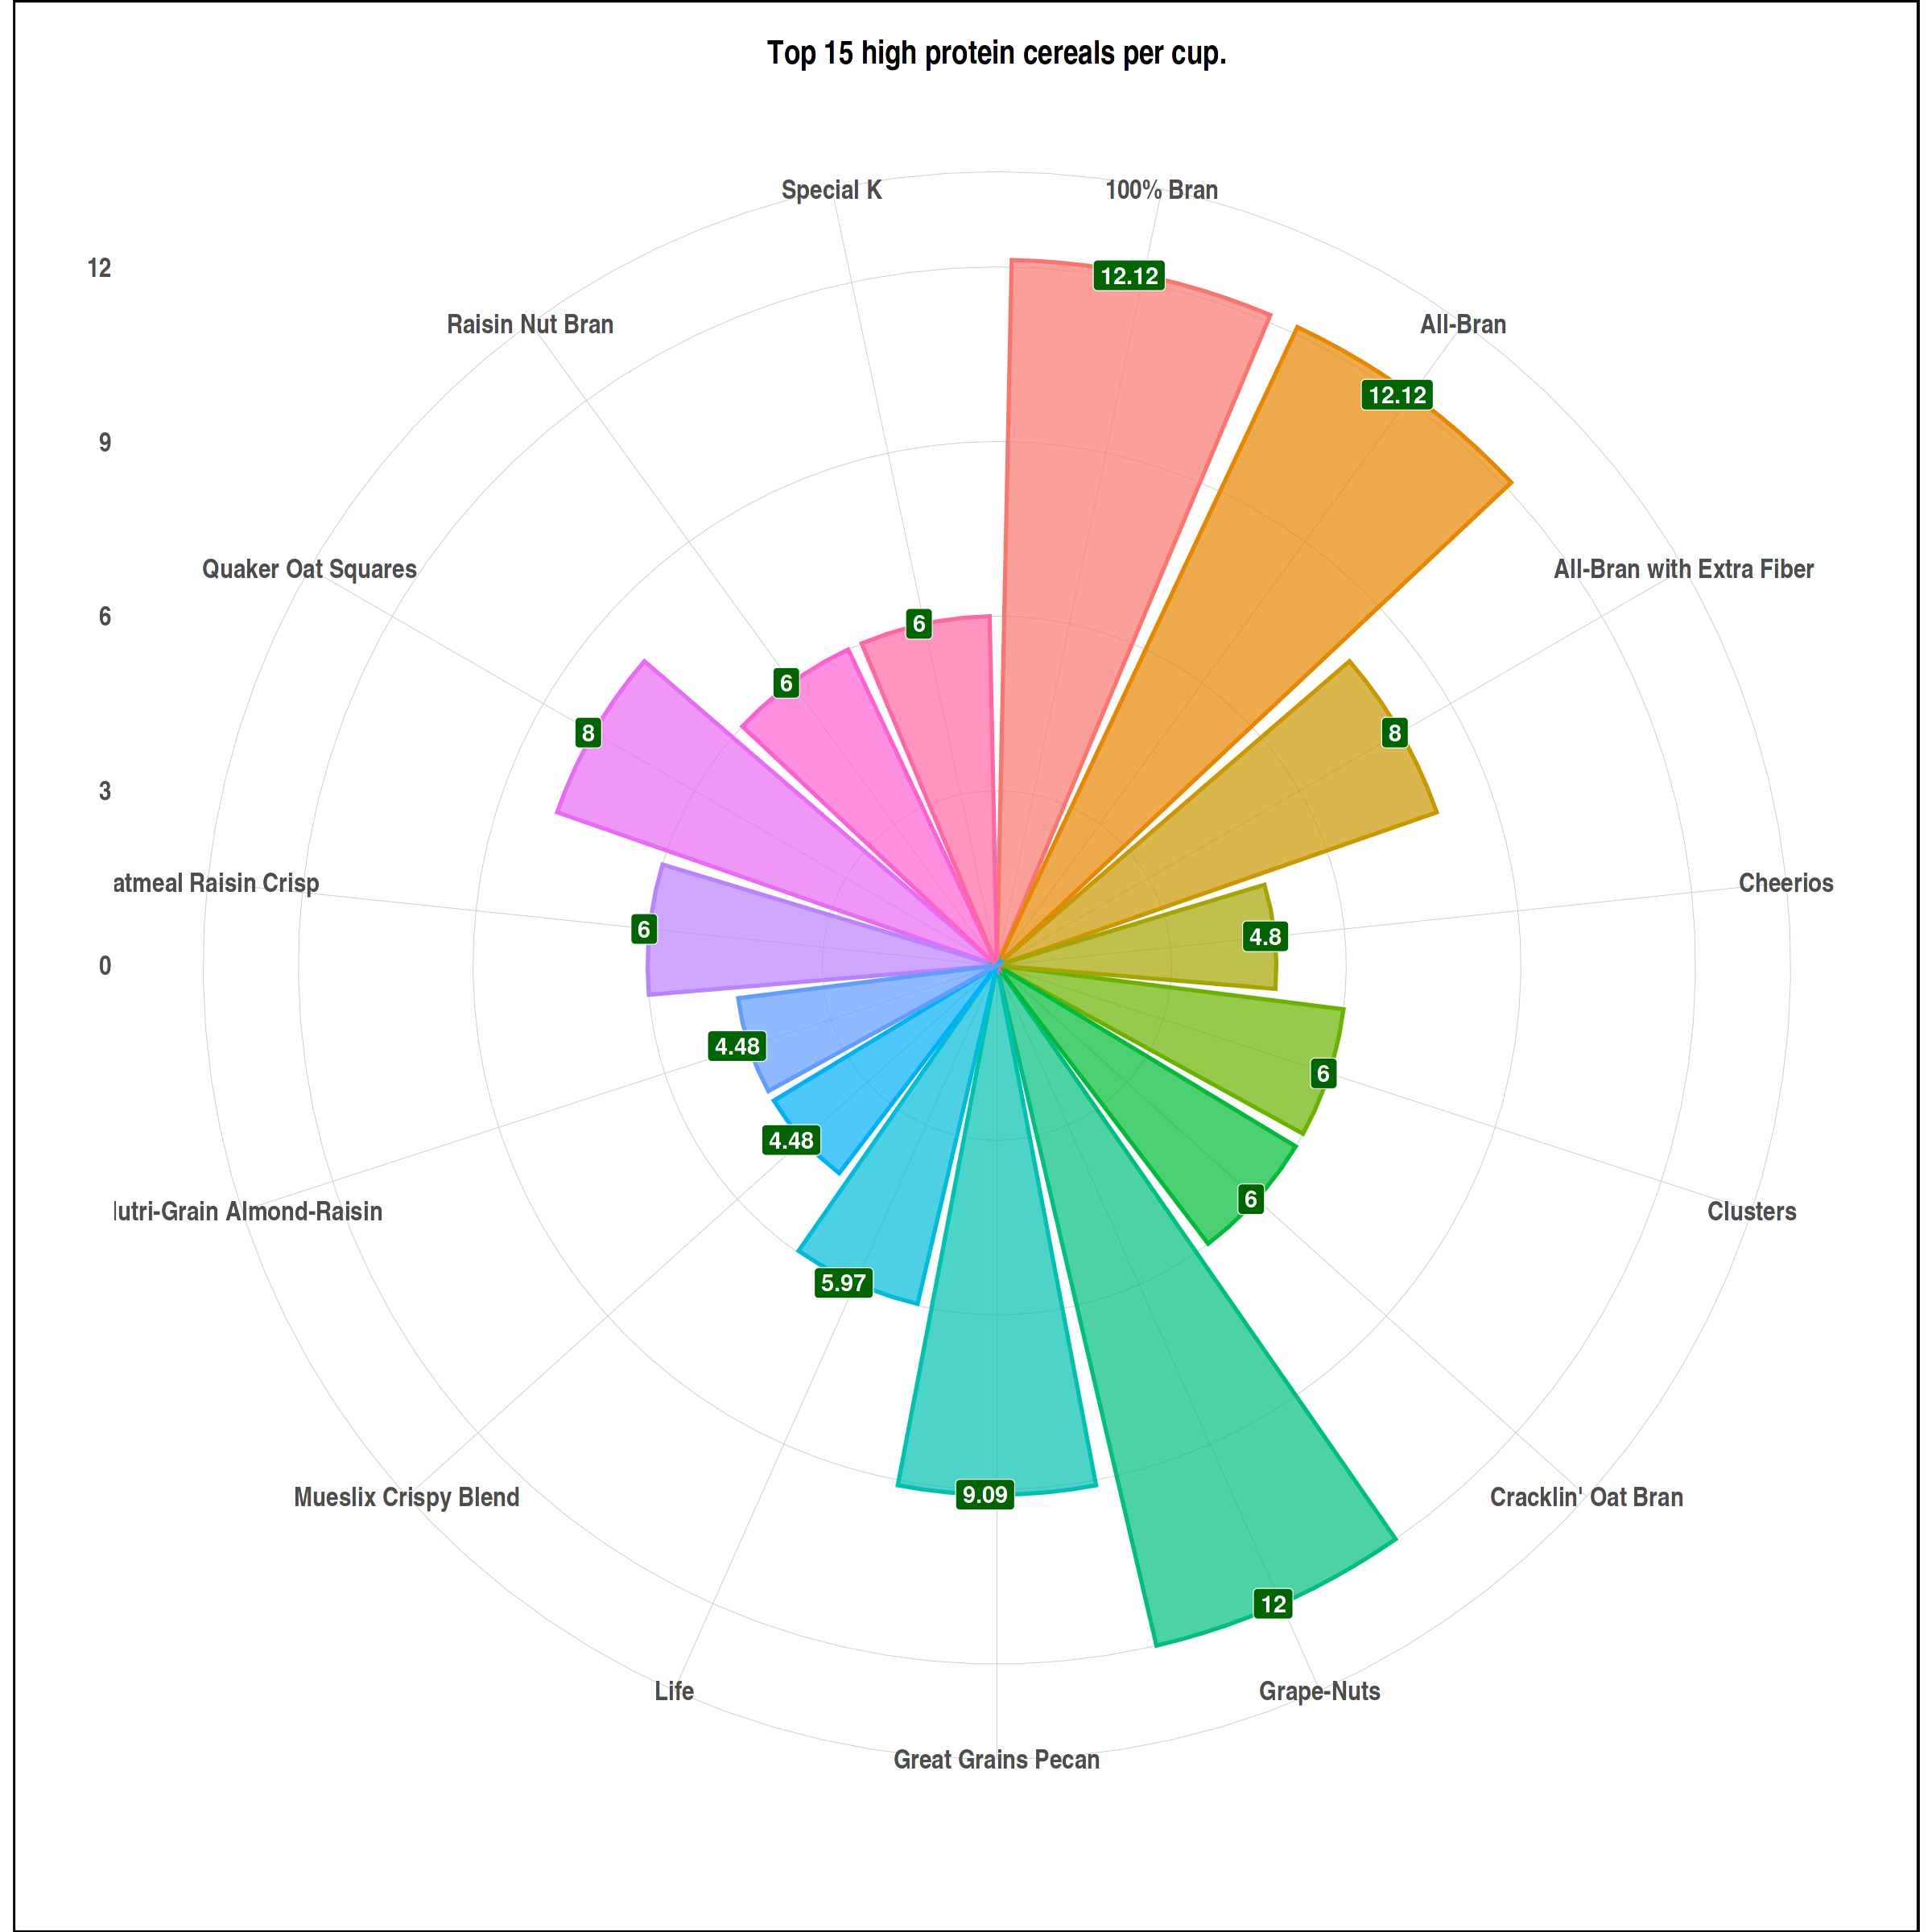

In [13]:
plot(top_protein+ coord_polar())

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


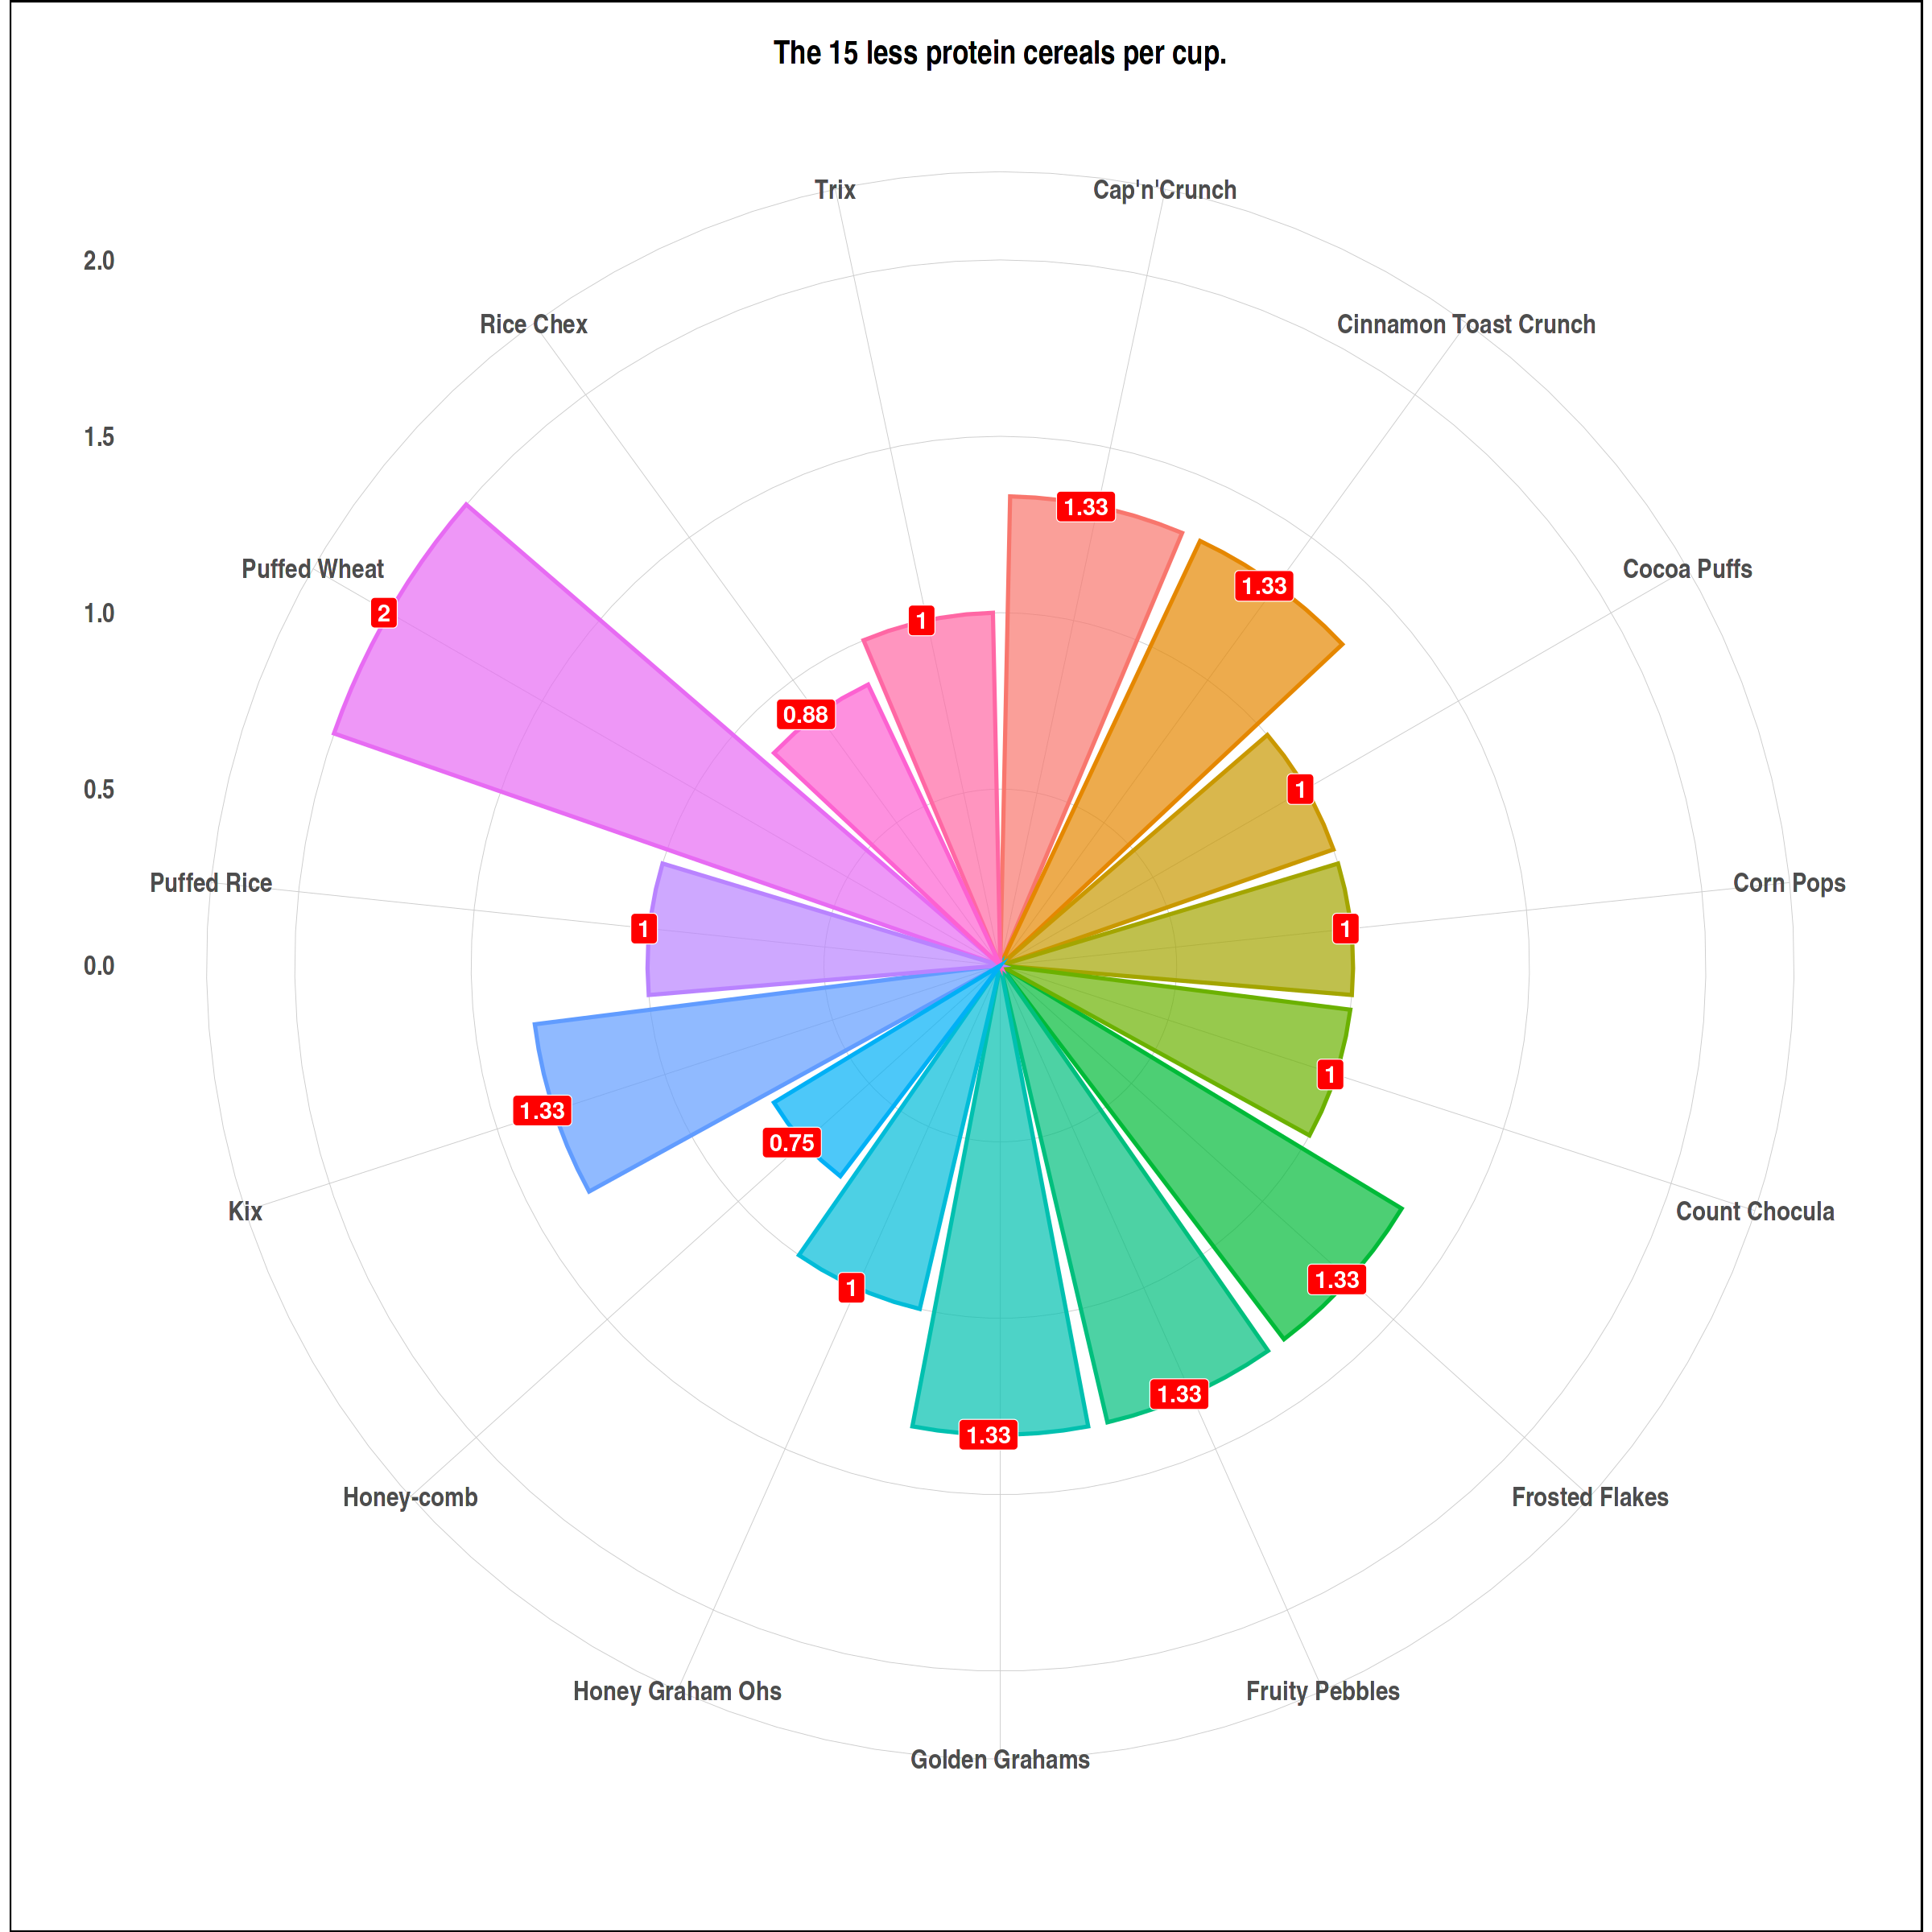

In [14]:
plot(bottom_protein+ coord_polar())

# Fat per cup

In [15]:
# sorting by fat 
serving_onecup <- serving_onecup[order(serving_onecup$fat, decreasing=TRUE), ]
head(serving_onecup,6)

cereal               calories protein fat  carbo fiber sugars potass
33 Great Grains Pecan   363.64   9.09    9.09 39.39 9.09  12.12  303.03
19 Cracklin' Oat Bran   220.00   6.00    6.00 20.00 8.00  14.00  320.00
2  100% Natural Bran    120.00   3.00    5.00  8.00 2.00   8.00  135.00
50 Oatmeal Raisin Crisp 260.00   6.00    4.00 27.00 3.00  20.00  240.00
13 Clusters             220.00   6.00    4.00 26.00 4.00  14.00  210.00
57 Raisin Nut Bran      200.00   6.00    4.00 21.00 5.00  16.00  280.00
   vitamins
33 75.76   
19 50.00   
2   0.00   
50 50.00   
13 50.00   
57 50.00

In [16]:
options(repr.plot.width = 20, repr.plot.height = 20)

df <- head(serving_onecup, 15)
top_fat <- ggplot(data = df, mapping = aes(x = cereal, y = fat)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=fat), fill = "red", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 15 cereals with most fat per cup.") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

df1 <- tail(serving_onecup, 40)
bottom_fat <- ggplot(data = df1, mapping = aes(x = cereal, y = fat)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=fat), fill = "#006400", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 40 cereals with less fat per cup.") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


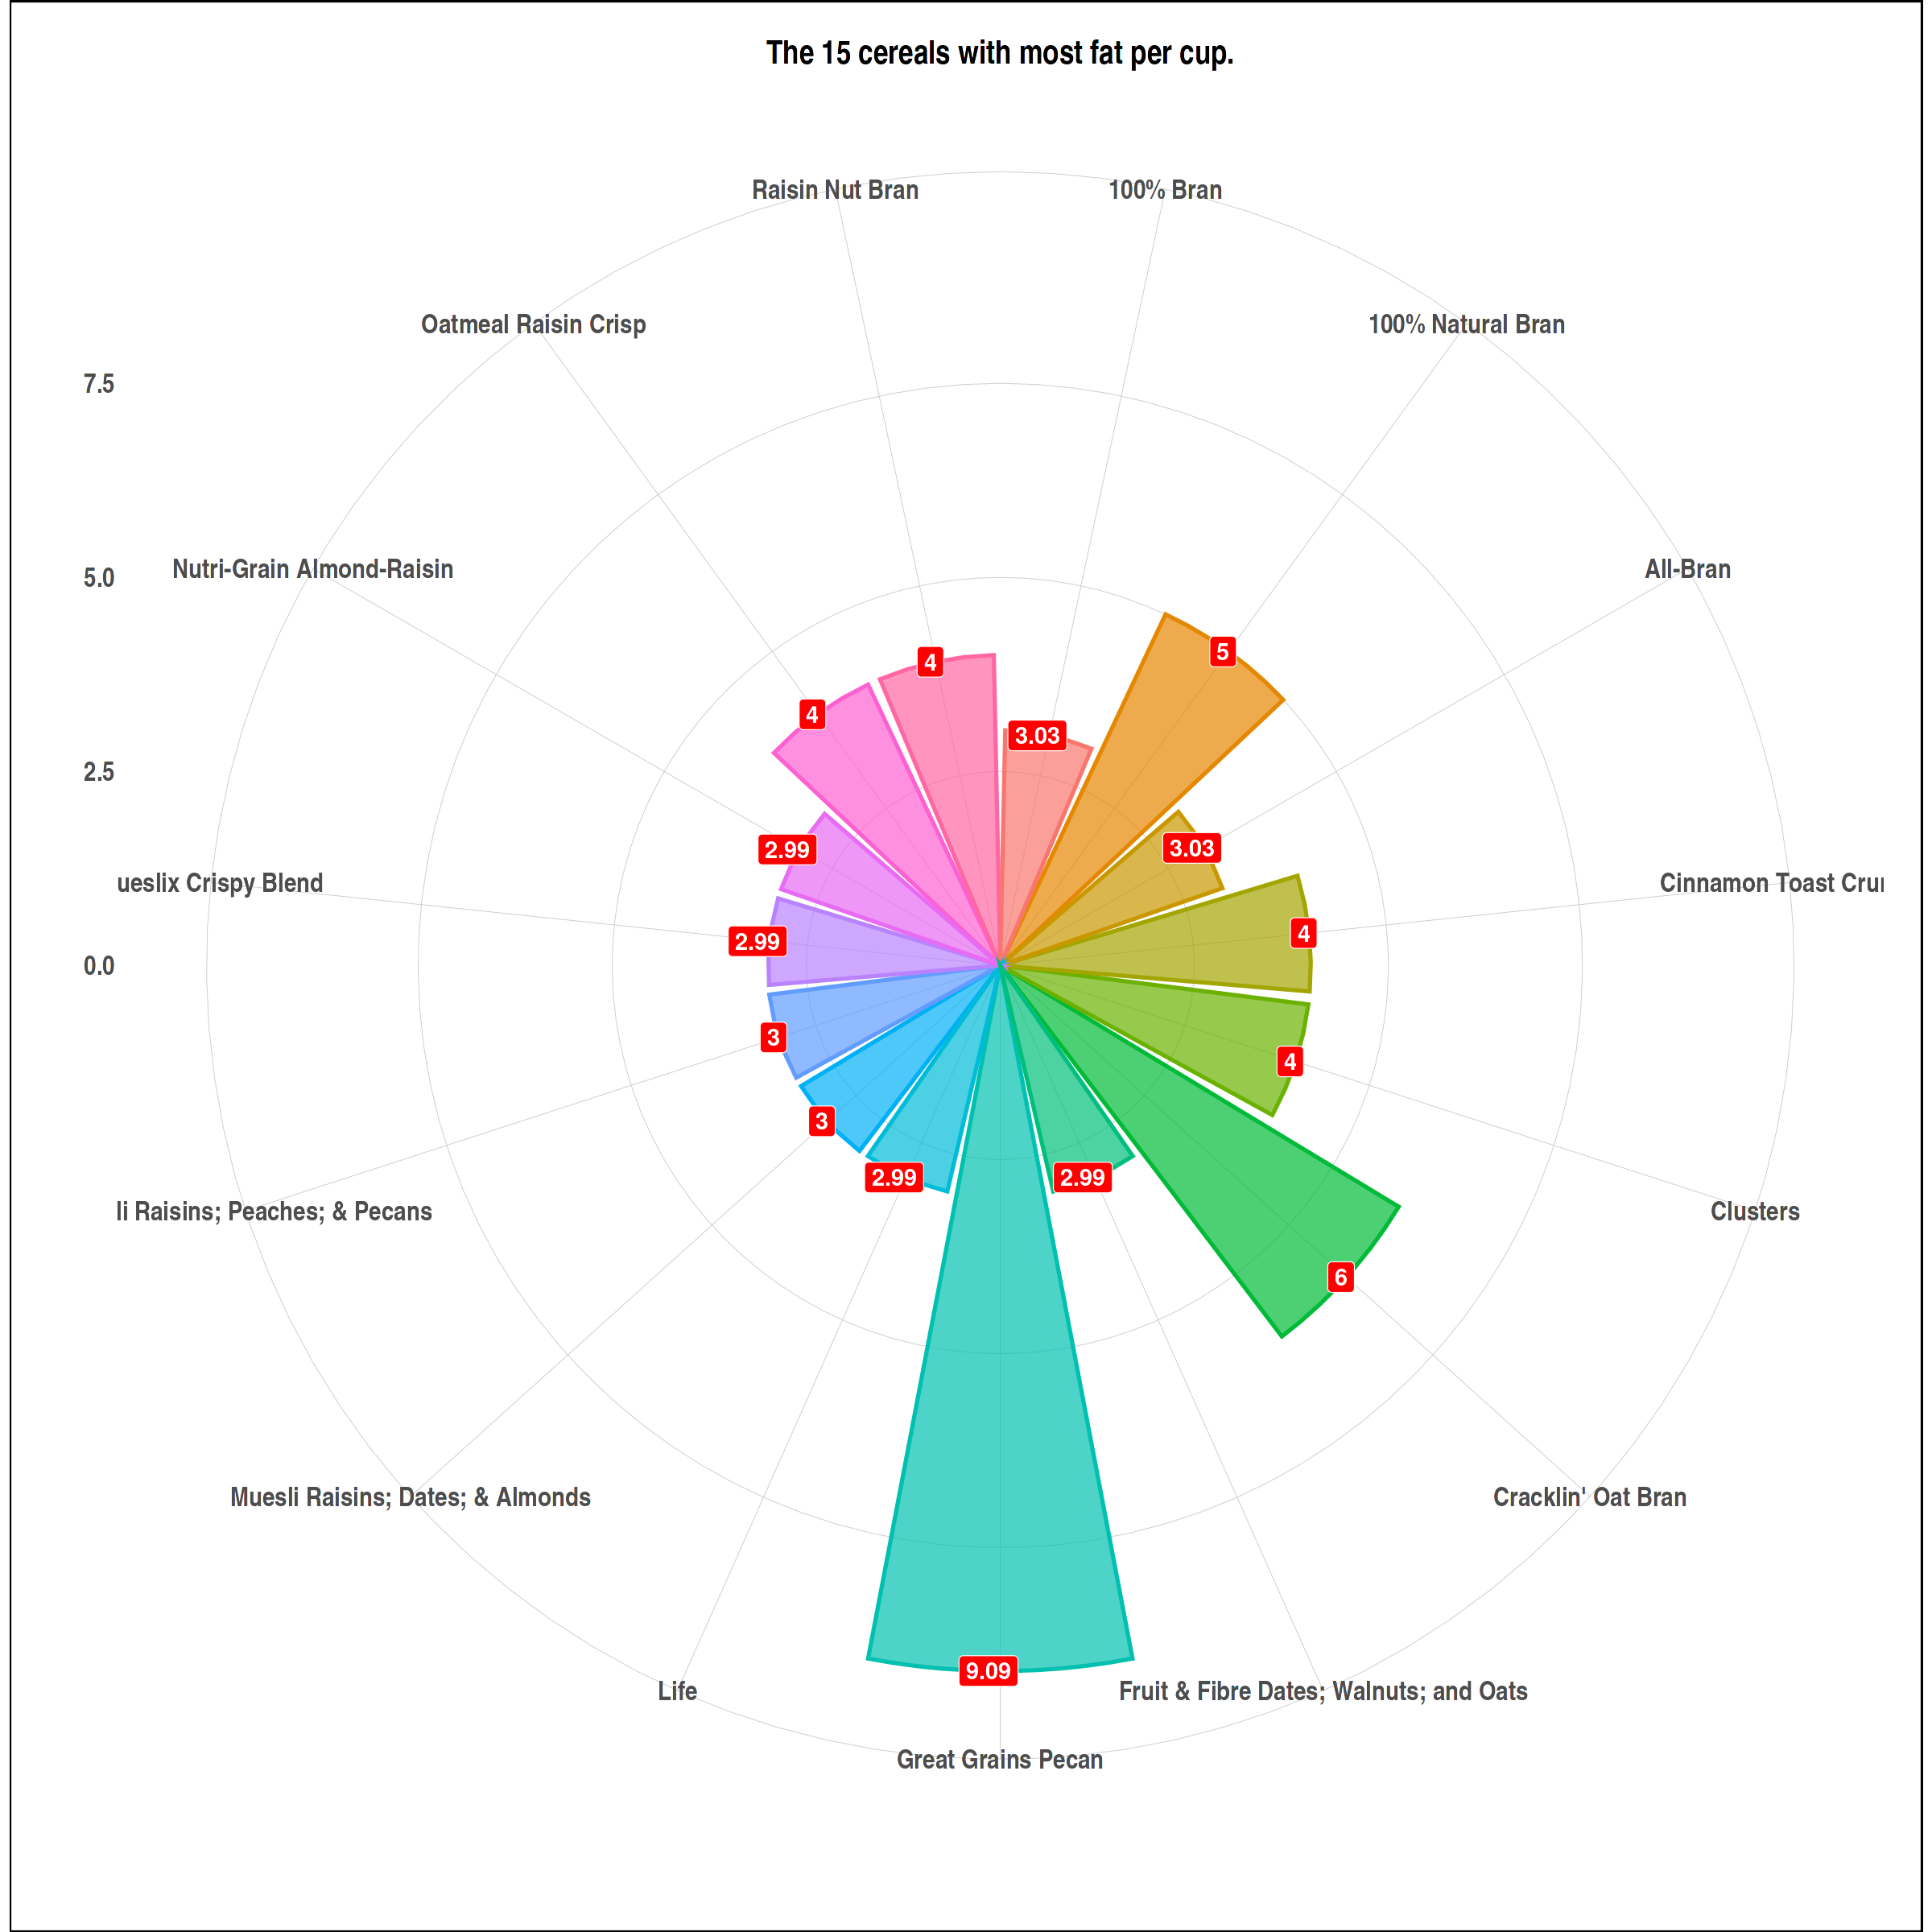

In [17]:
plot(top_fat+ coord_polar())

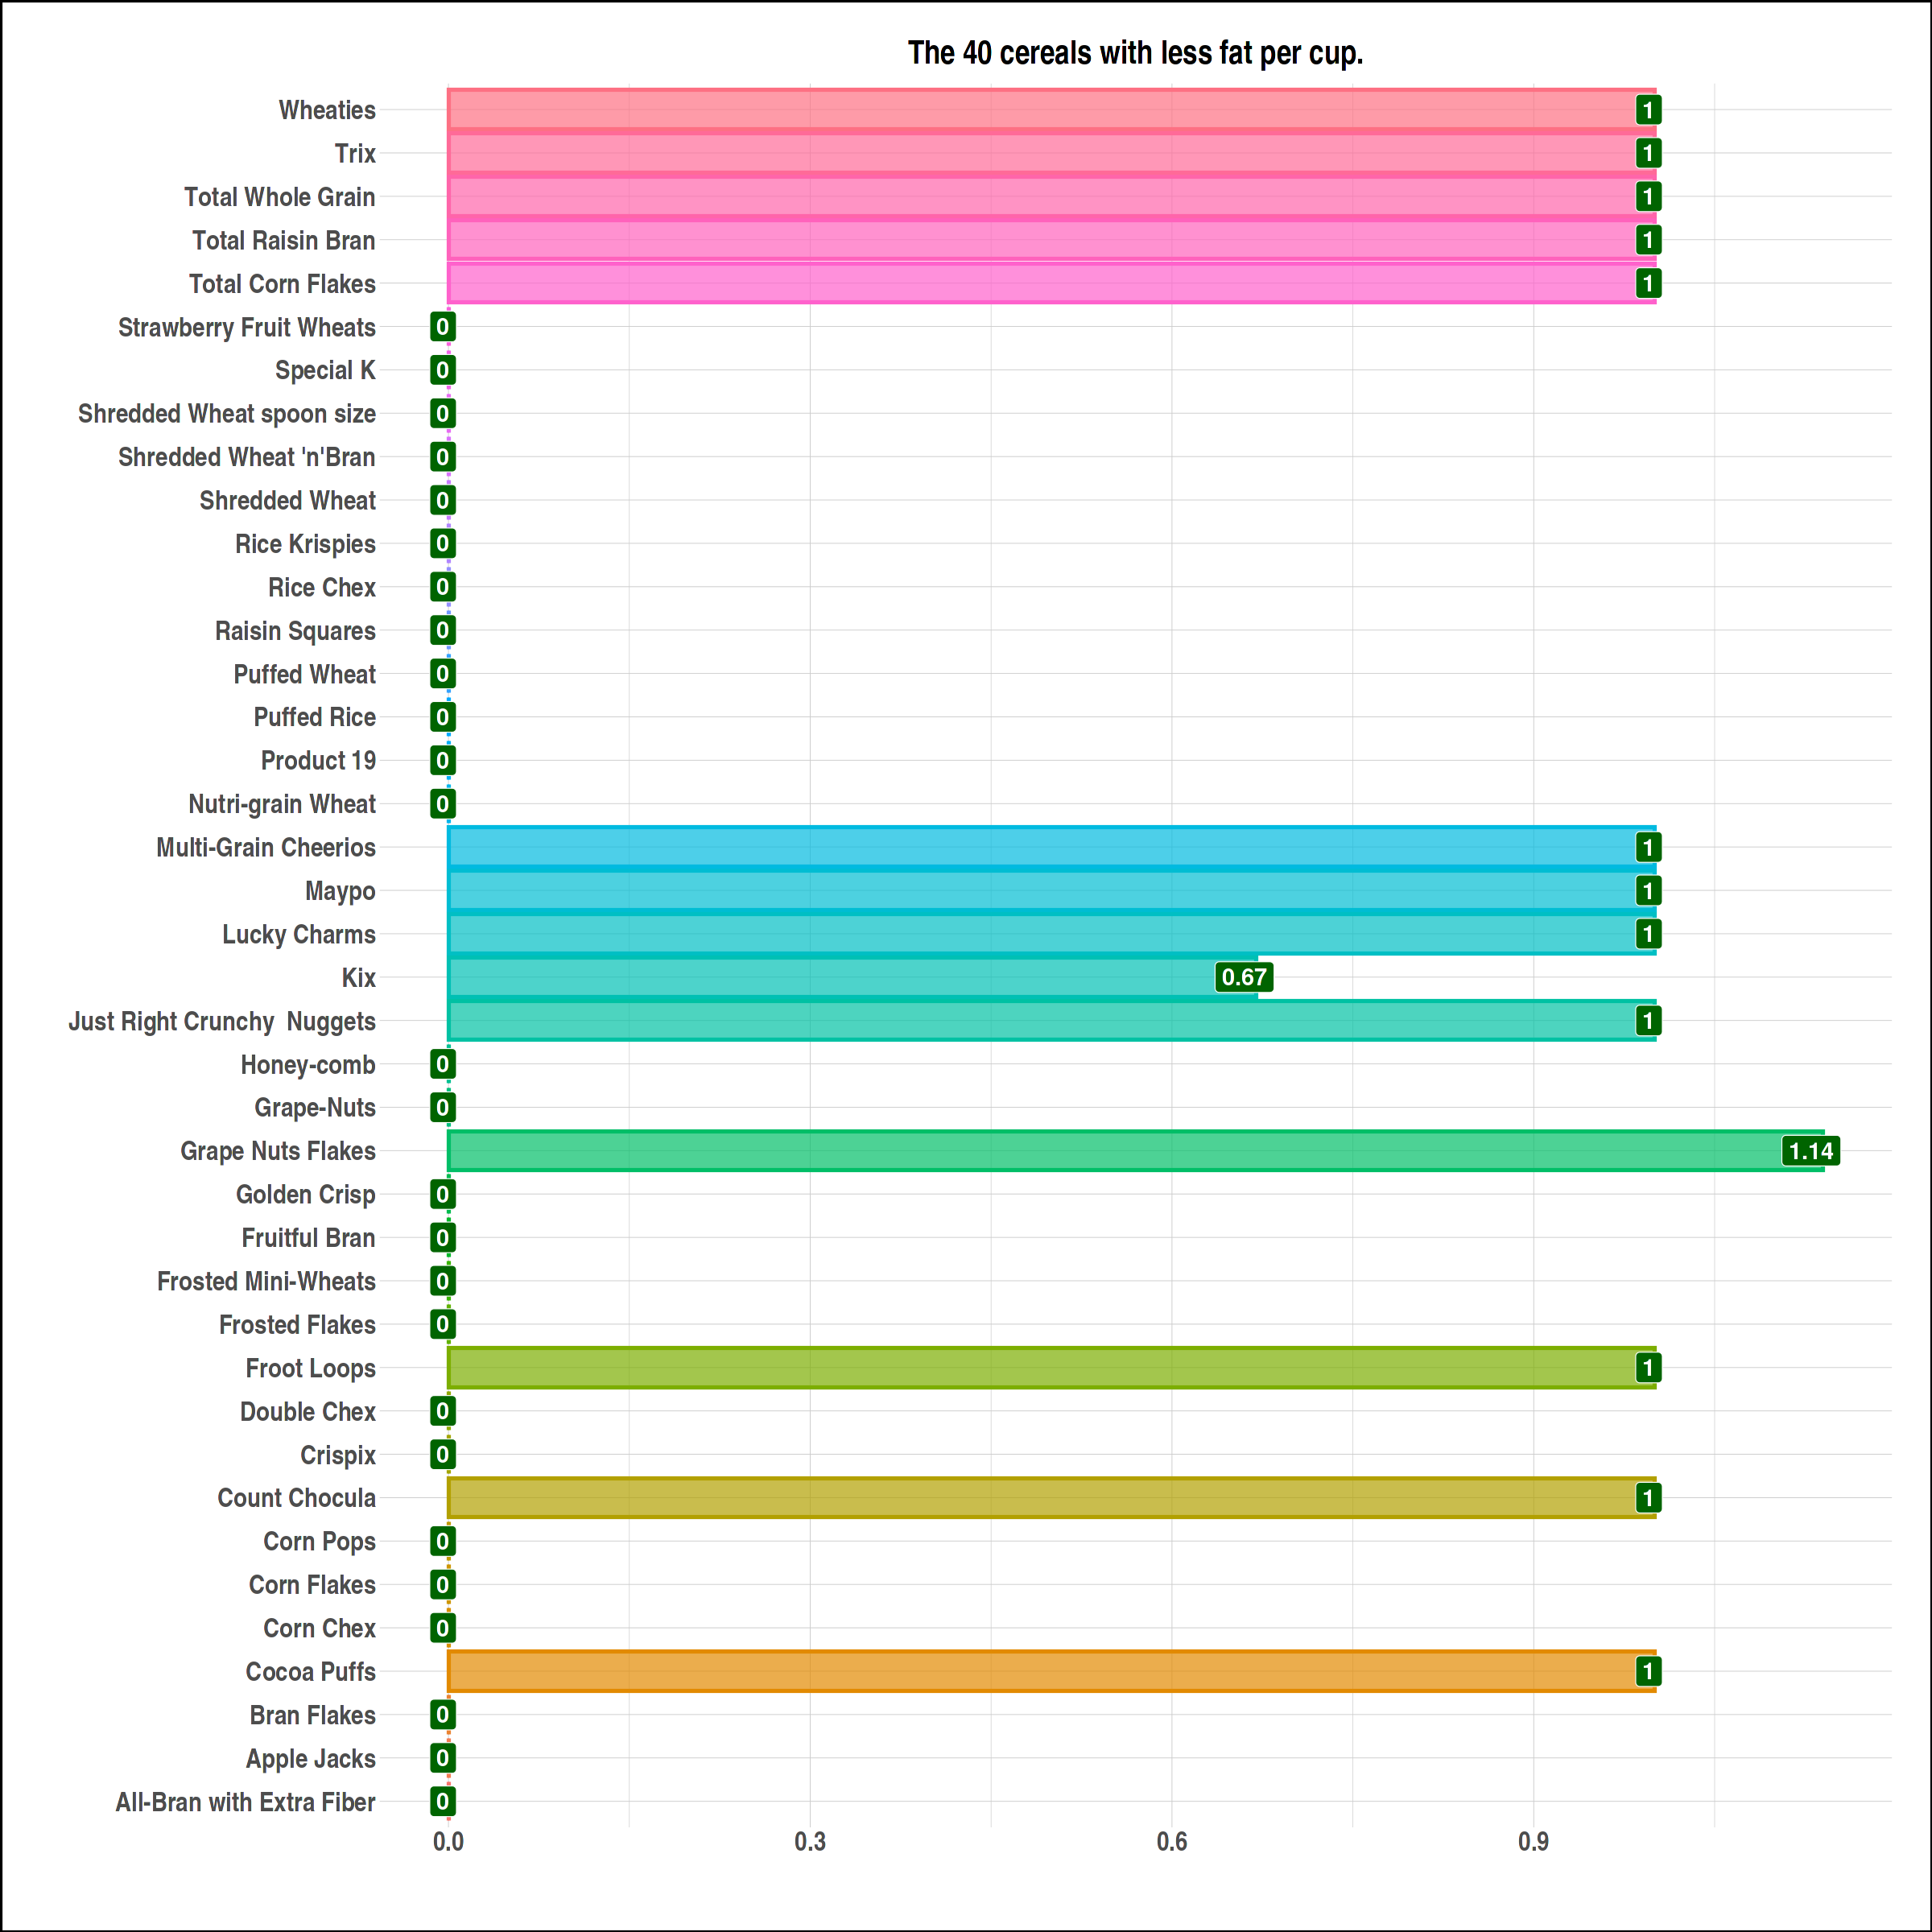

In [18]:
plot(bottom_fat)

## Carbs per cup

In [19]:
# sorting by carbs
serving_onecup <- serving_onecup[order(serving_onecup$carbo, decreasing=TRUE), ]
head(serving_onecup,6)

cereal                    calories protein fat  carbo fiber sugars potass
32 Grape-Nuts                440.00   12.00   0.00 68.00 12.00 12.00  360.00
33 Great Grains Pecan        363.64    9.09   9.09 39.39  9.09 12.12  303.03
48 Nutri-Grain Almond-Raisin 208.96    4.48   2.99 31.34  4.48 10.45  194.03
58 Raisin Squares            180.00    4.00   0.00 30.00  4.00 12.00  220.00
63 Shredded Wheat spoon size 134.33    4.48   0.00 29.85  4.48  0.00  179.10
62 Shredded Wheat 'n'Bran    134.33    4.48   0.00 28.36  5.97  0.00  208.96
   vitamins
32 100.00  
33  75.76  
48  37.31  
58  50.00  
63   0.00  
62   0.00

In [20]:
options(repr.plot.width = 20, repr.plot.height = 20)

df <- head(serving_onecup, 10)
top_carbo <- ggplot(data = df, mapping = aes(x = cereal, y = carbo)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=carbo), fill = "red", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 10 cereals with most carbs per cup") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

df1 <- tail(serving_onecup, 10)
bottom_carbo <- ggplot(data = df1, mapping = aes(x = cereal, y = carbo)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=carbo), fill = "#006400", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 10 cereals with less carbs per cup") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


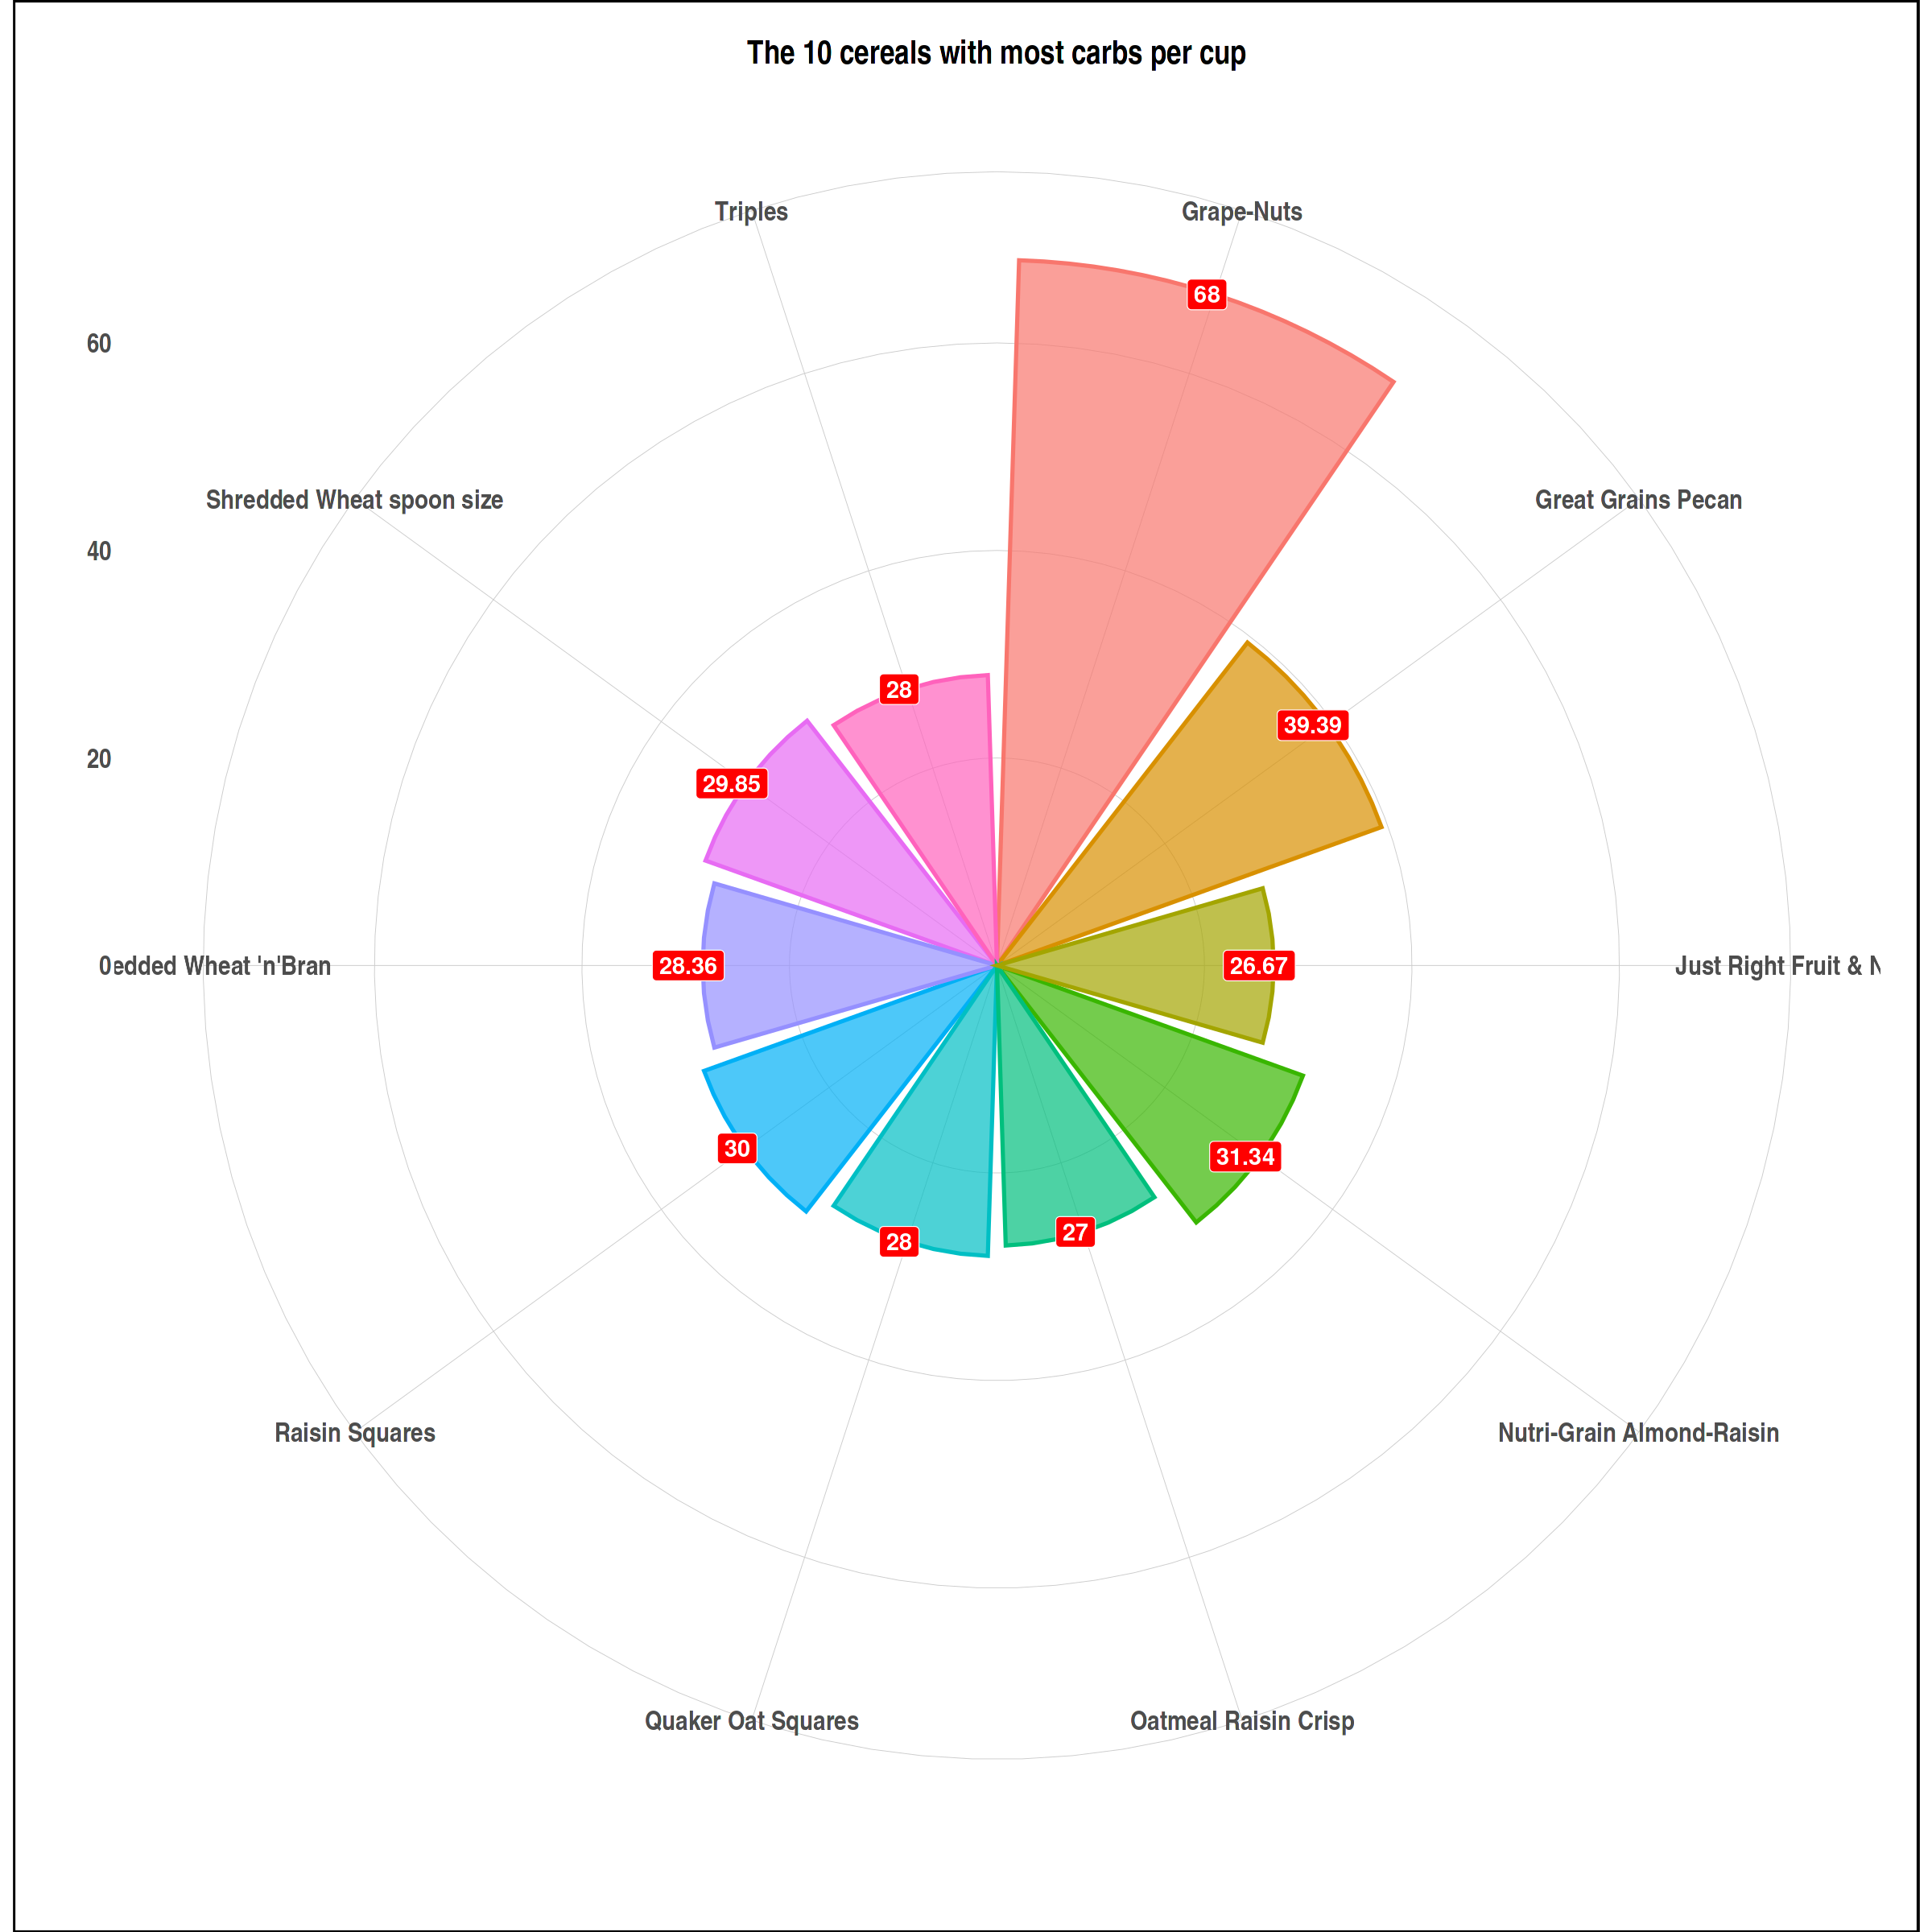

In [21]:
plot(top_carbo+ coord_polar())

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


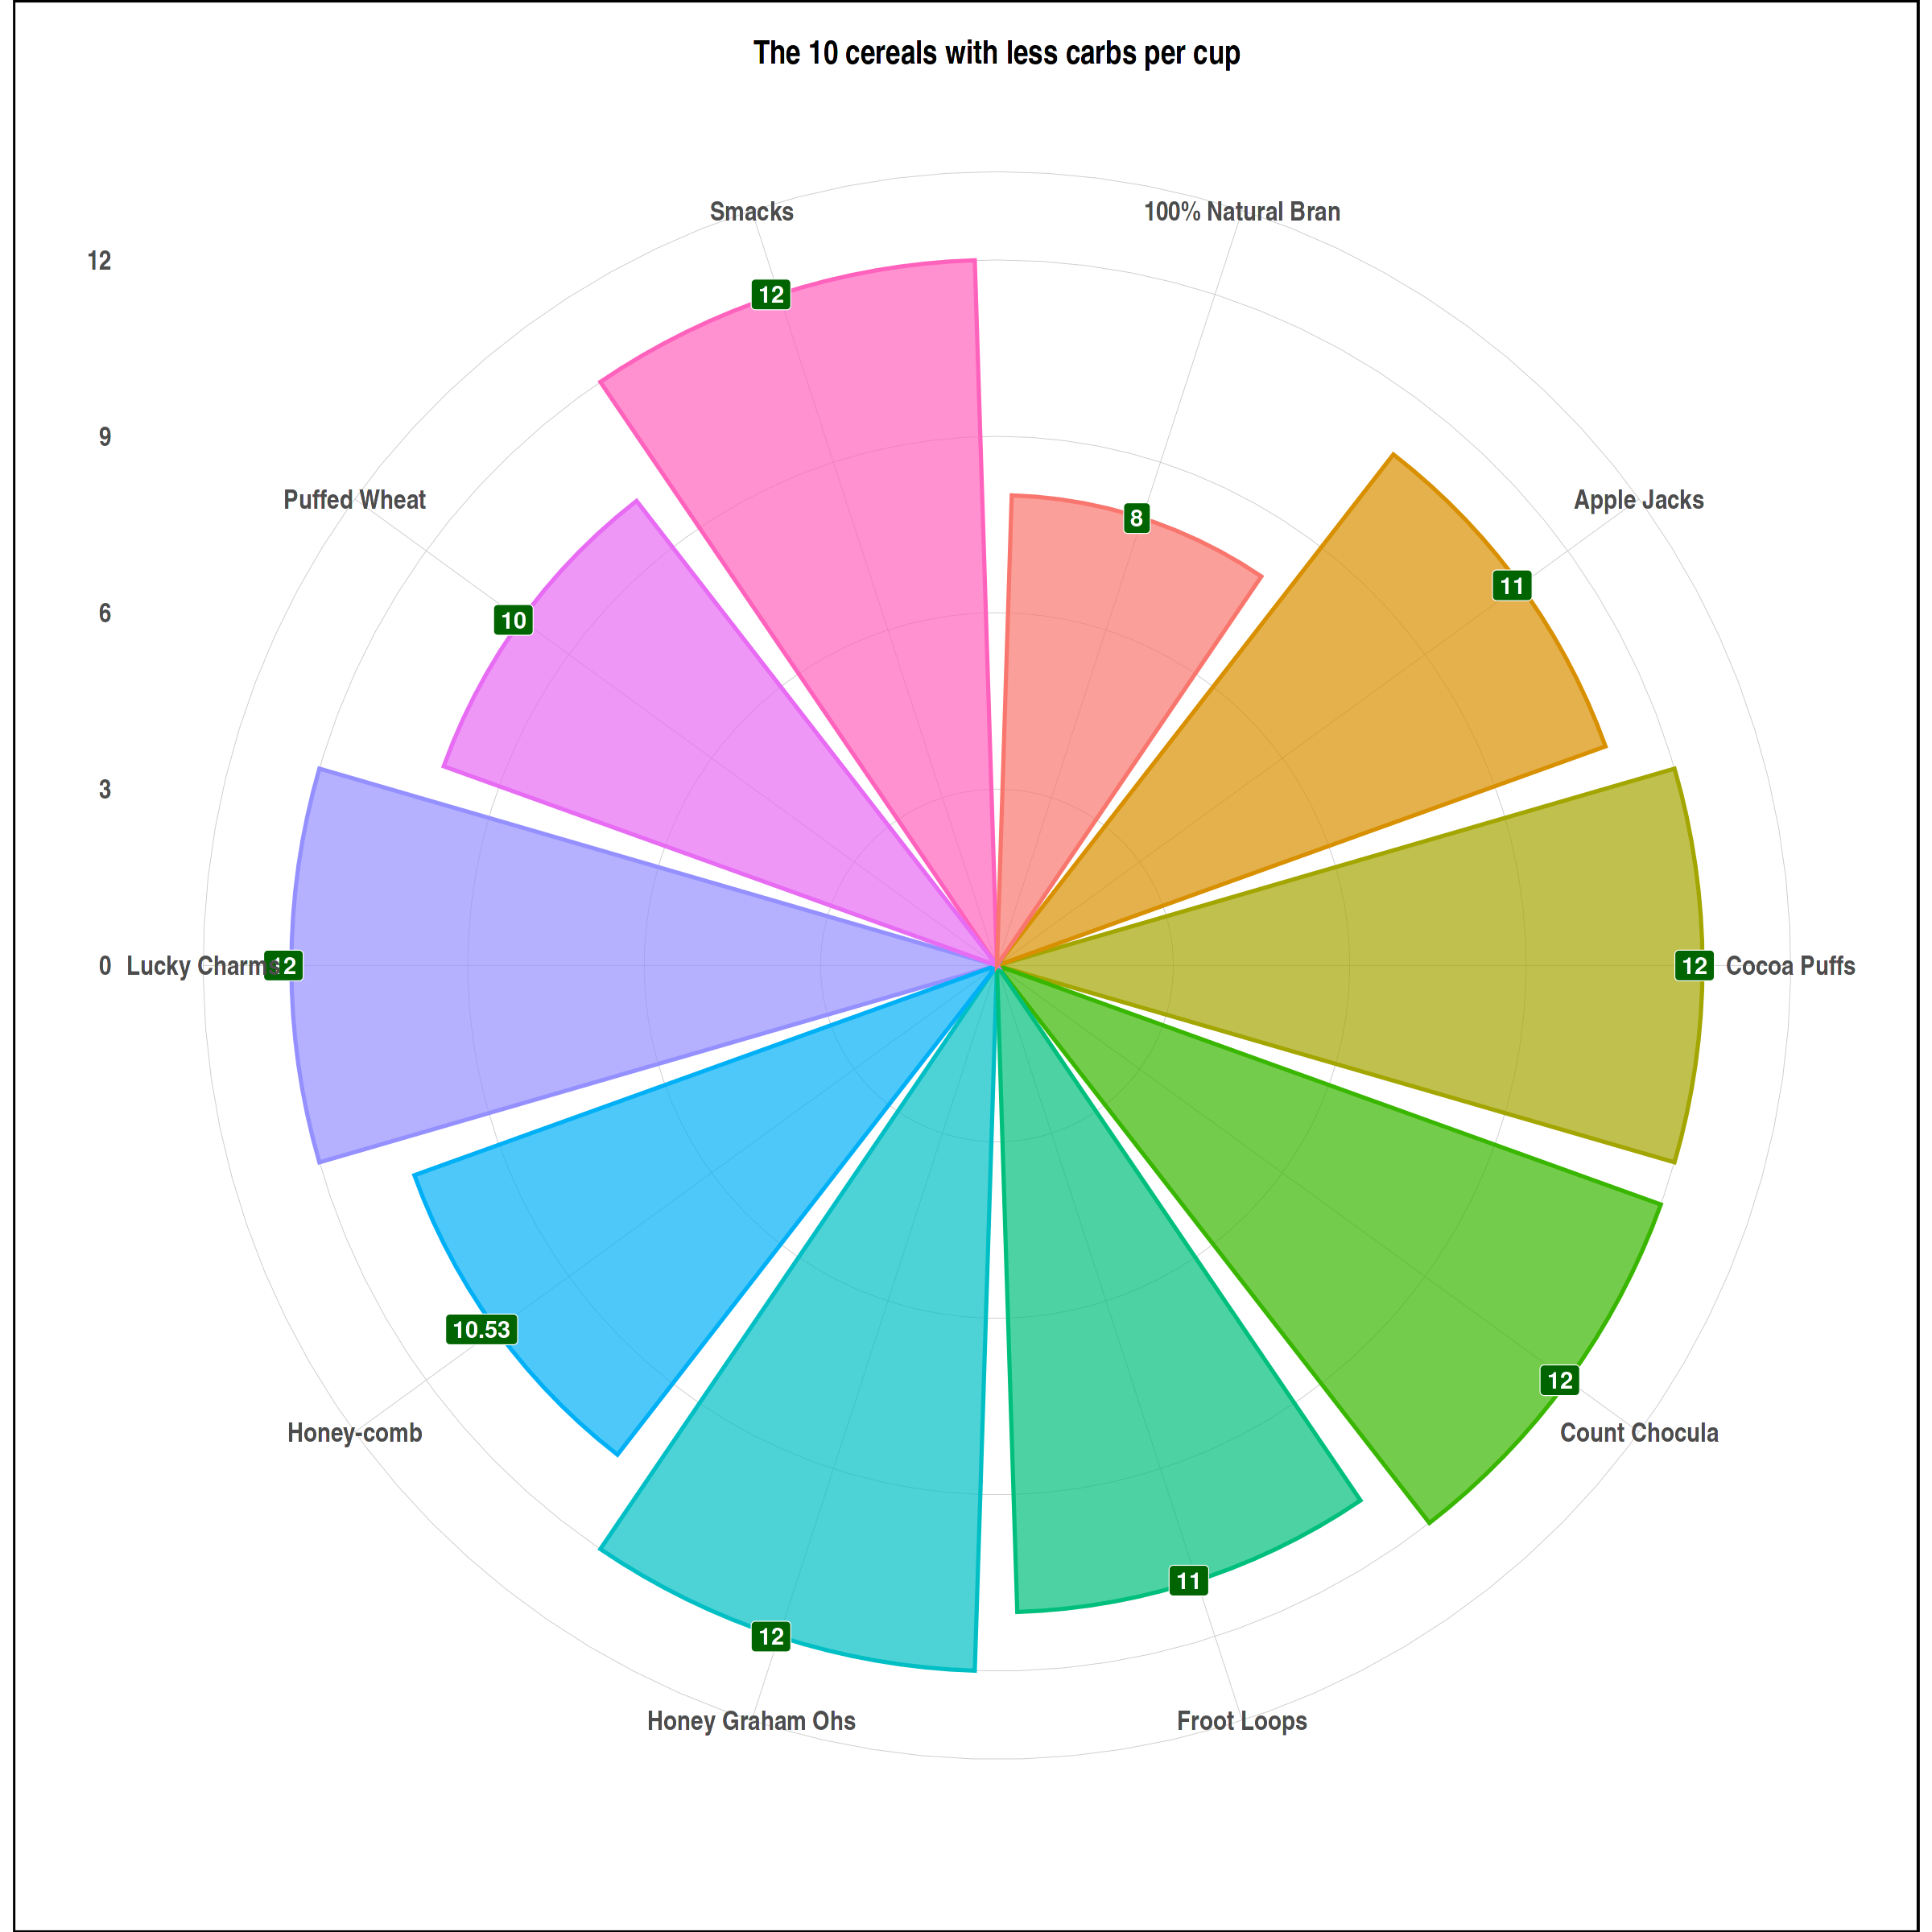

In [22]:
plot(bottom_carbo+ coord_polar())

## Fiber per cup

In [23]:
# sorting by fiber
serving_onecup <- serving_onecup[order(serving_onecup$fiber, decreasing=TRUE), ]
head(serving_onecup,6)

cereal                    calories protein fat  carbo fiber sugars potass
1  100% Bran                 212.12   12.12   3.03 15.15 30.30 18.18  848.48
4  All-Bran with Extra Fiber 100.00    8.00   0.00 16.00 28.00  0.00  660.00
3  All-Bran                  212.12   12.12   3.03 21.21 27.27 15.15  969.70
32 Grape-Nuts                440.00   12.00   0.00 68.00 12.00 12.00  360.00
33 Great Grains Pecan        363.64    9.09   9.09 39.39  9.09 12.12  303.03
51 Post Nat. Raisin Bran     179.10    4.48   1.49 16.42  8.96 20.90  388.06
   vitamins
1   75.76  
4   50.00  
3   75.76  
32 100.00  
33  75.76  
51  37.31

In [24]:
options(repr.plot.width = 20, repr.plot.height = 20)

df <- head(serving_onecup, 10)
top_fiber <- ggplot(data = df, mapping = aes(x = cereal, y = fiber)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=fiber), fill = "#006400", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("Top 10 high fiber cereals per cup.") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

df1 <- tail(serving_onecup, 40)
bottom_fiber <- ggplot(data = df1, mapping = aes(x = cereal, y = fiber)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=fiber), fill = "red", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 40 less fiber cereals per cup.") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


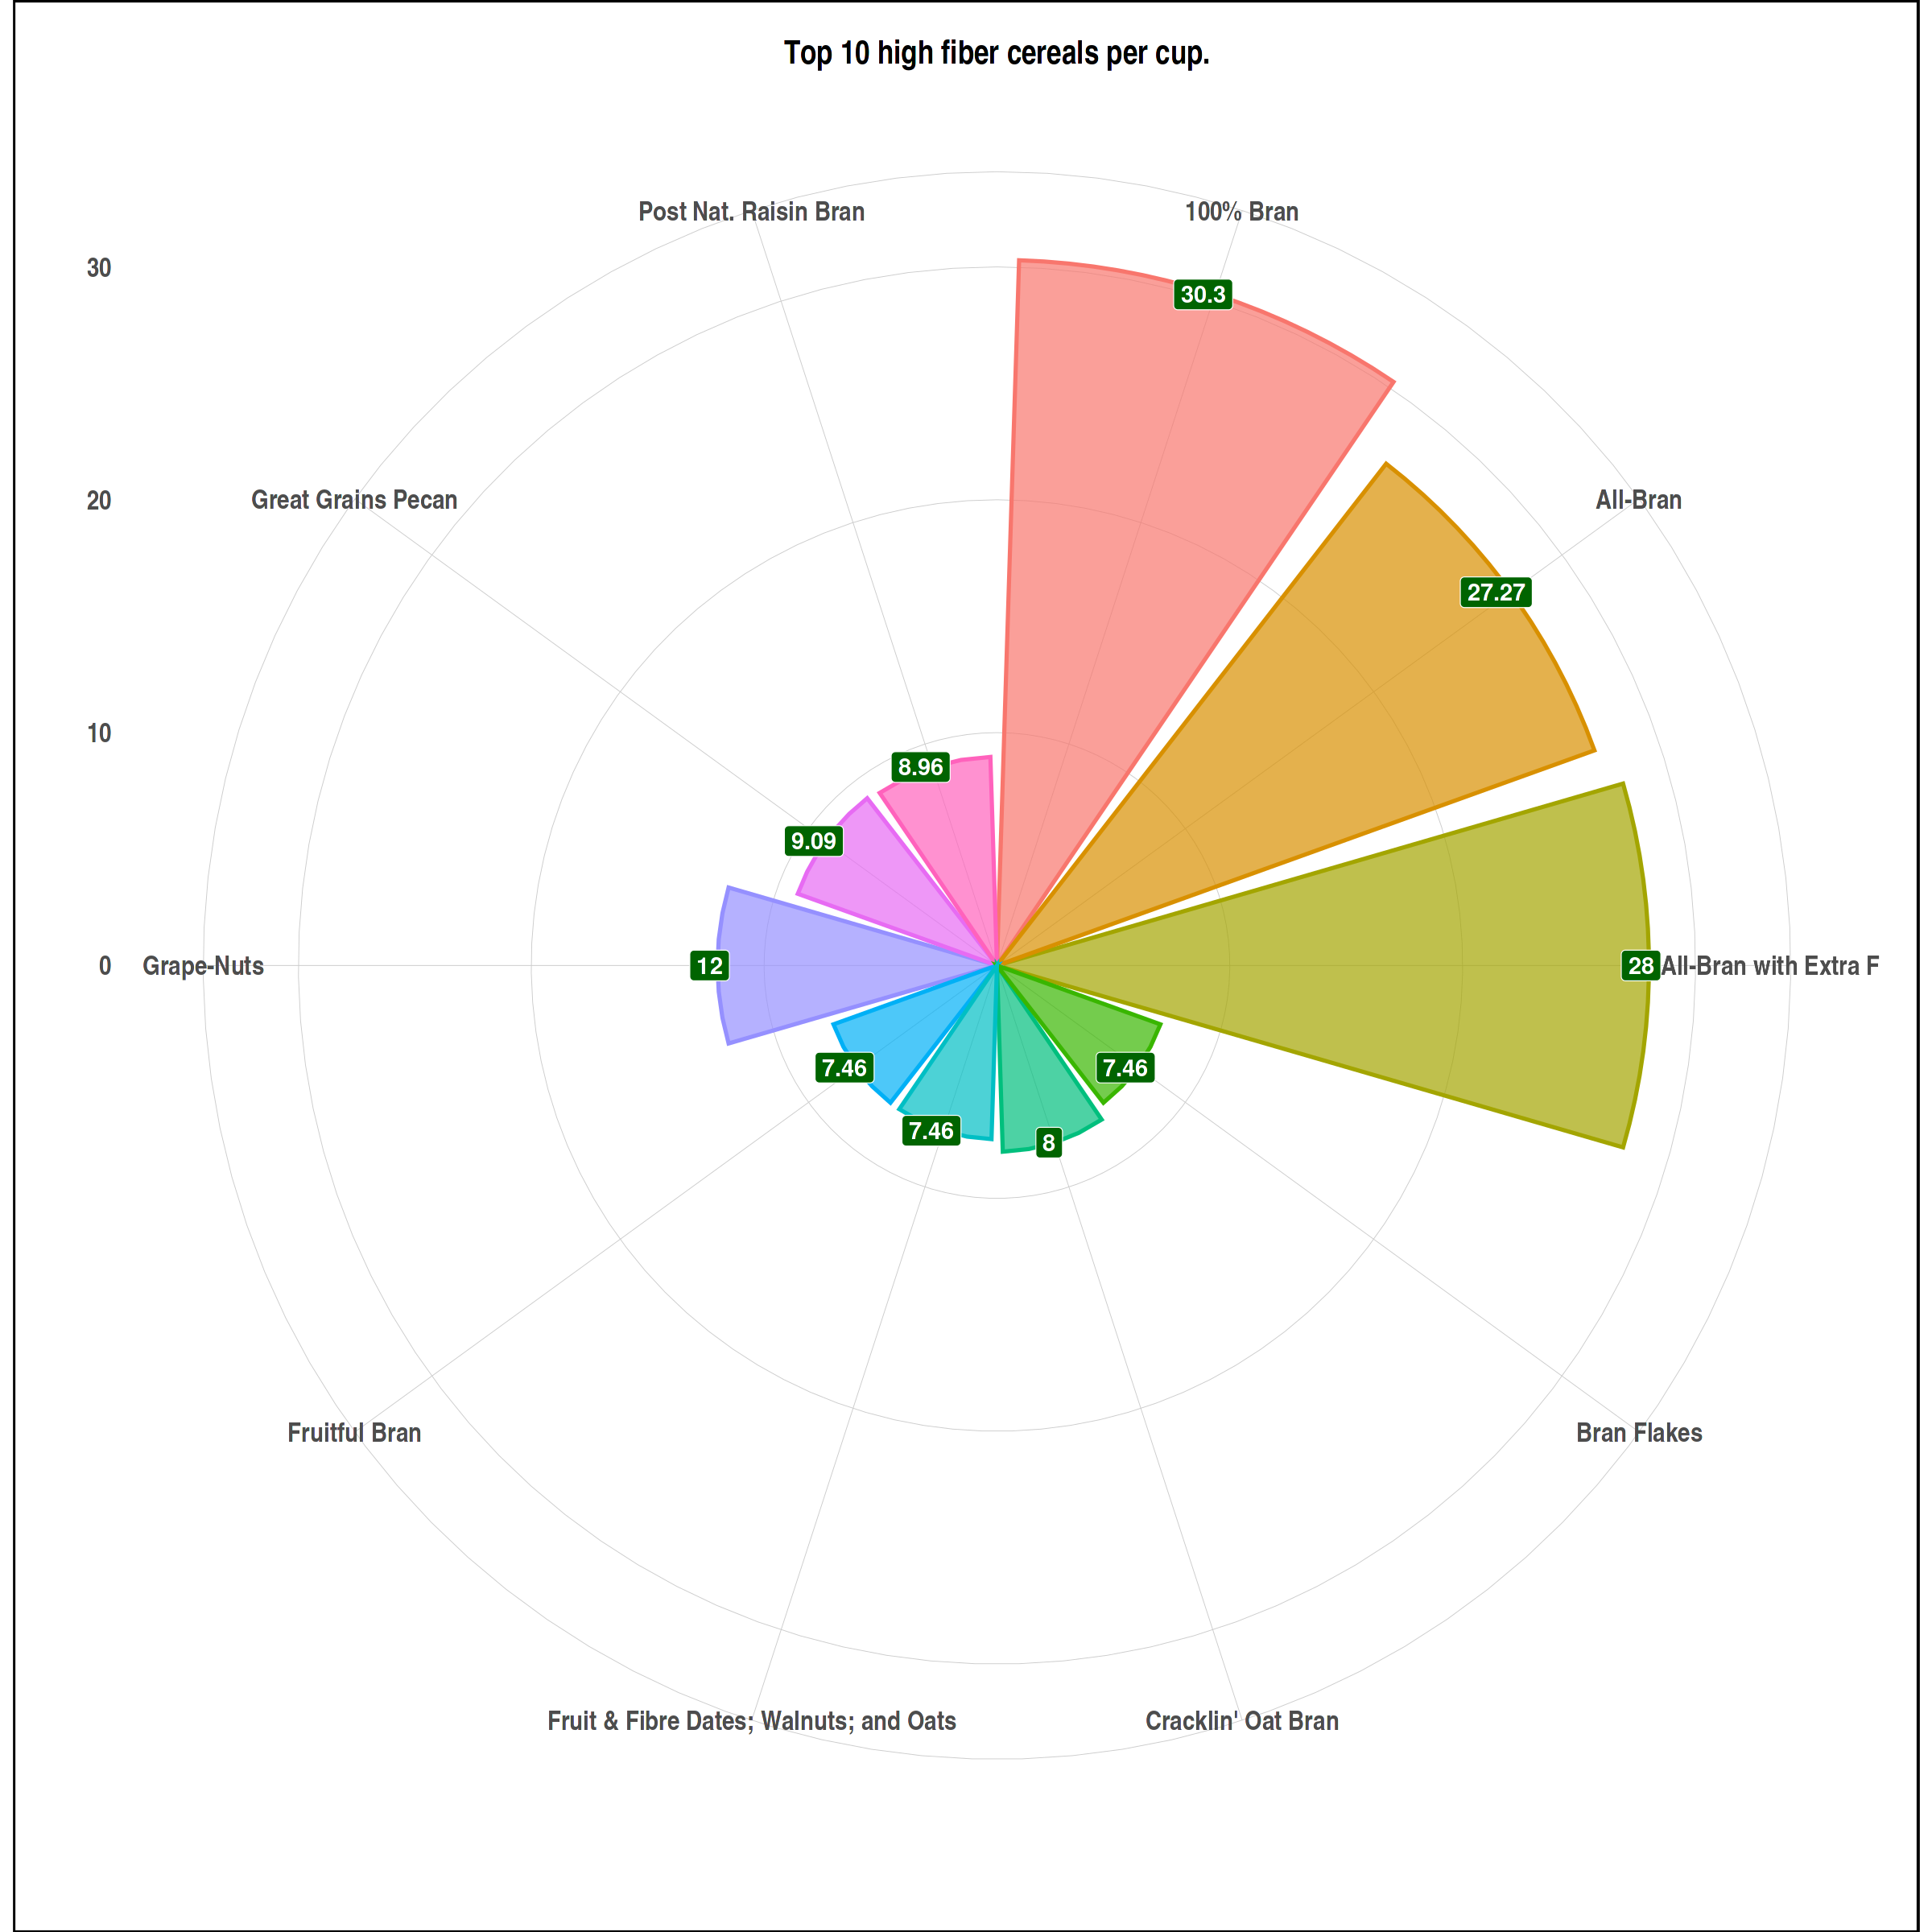

In [25]:
plot(top_fiber+ coord_polar())

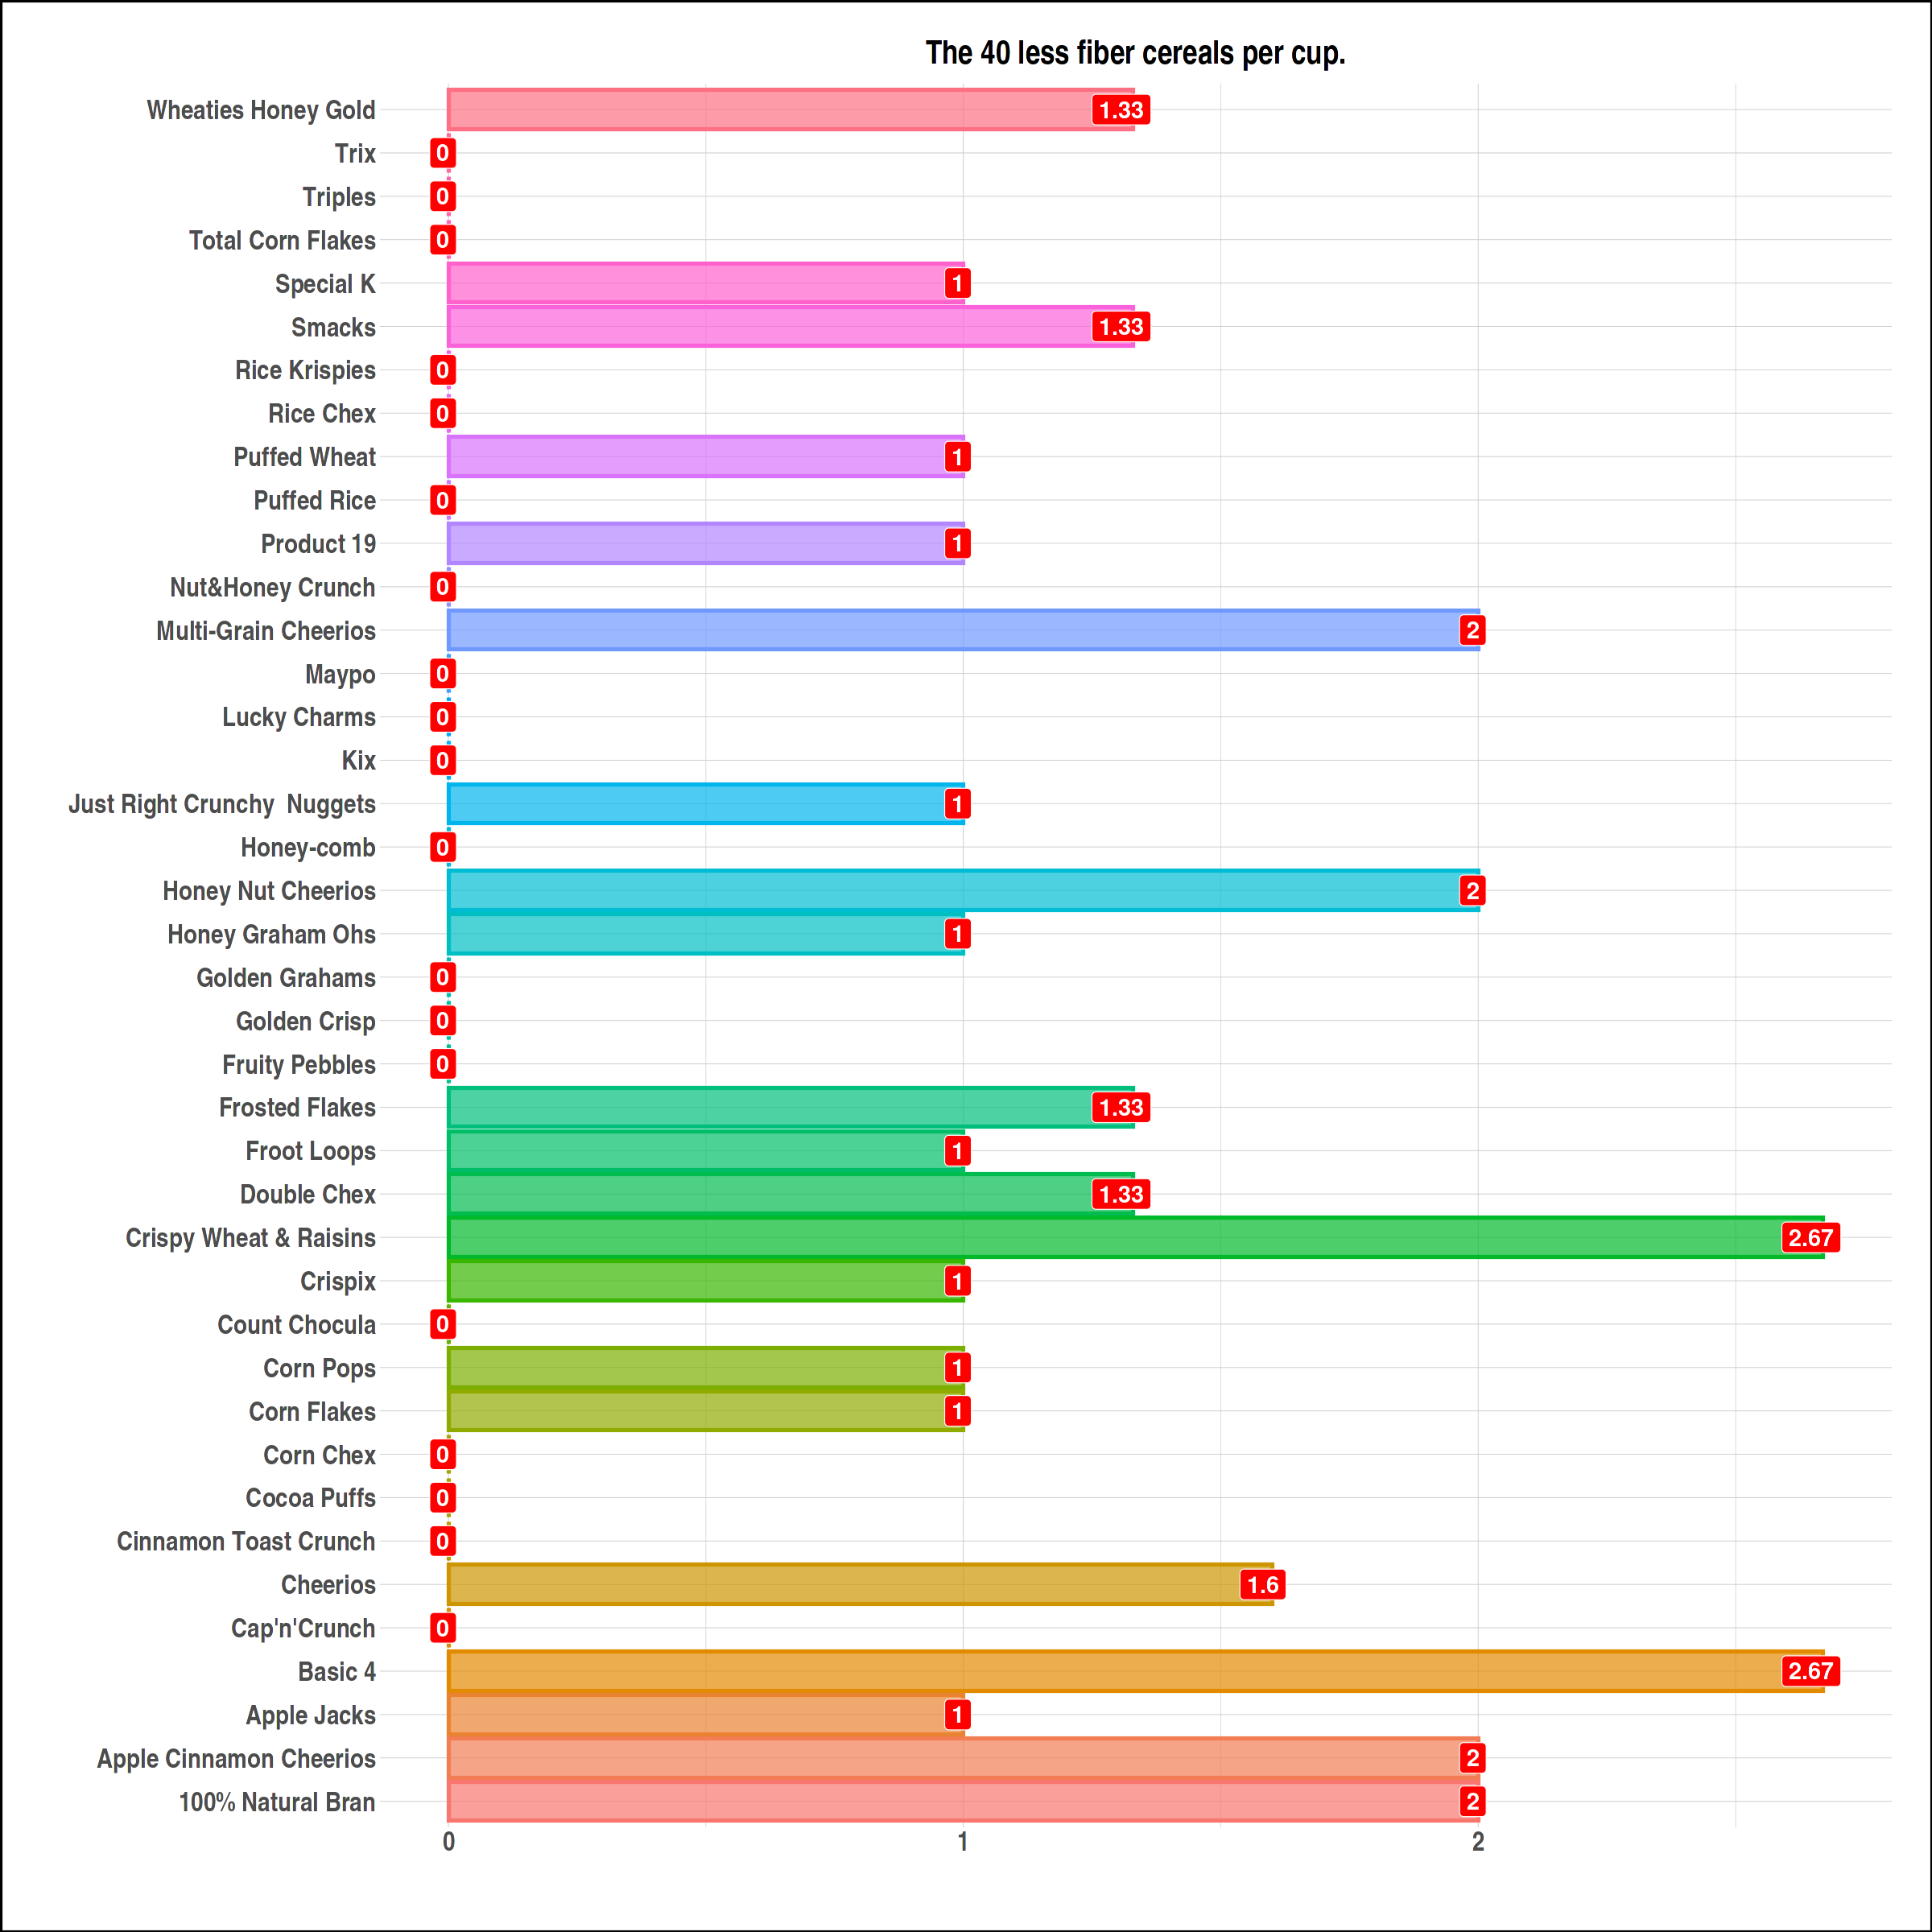

In [26]:
plot(bottom_fiber)

# Sugar per cup 

In [27]:
# sorting by sugar
serving_onecup <- serving_onecup[order(serving_onecup$sugars, decreasing=TRUE), ]
head(serving_onecup,16)

cereal                                 calories protein fat  carbo fiber
51 Post Nat. Raisin Bran                  179.10    4.48   1.49 16.42  8.96
50 Oatmeal Raisin Crisp                   260.00    6.00   4.00 27.00  3.00
64 Smacks                                 146.67    2.67   1.33 12.00  1.33
45 Mueslix Crispy Blend                   238.81    4.48   2.99 25.37  4.48
1  100% Bran                              212.12   12.12   3.03 15.15 30.30
27 Fruitful Bran                          179.10    4.48   0.00 20.90  7.46
29 Golden Crisp                           113.64    2.27   0.00 12.50  0.00
56 Raisin Bran                            160.00    4.00   1.33 18.67  6.67
57 Raisin Nut Bran                        200.00    6.00   4.00 21.00  5.00
28 Fruity Pebbles                         146.67    1.33   1.33 17.33  0.00
10 Cap'n'Crunch                           160.00    1.33   2.67 16.00  0.00
3  All-Bran                               212.12   12.12   3.03 21.21 27.27
26 Fruit & Fibre Dates; Walnuts; and Oats 179.10    4.48   2.99 17.91  7.46
24 Frosted Flakes                         146.67    1.33   0.00 18.67  1.33
19 Cracklin' Oat Bran                     220.00    6.00   6.00 20.00  8.00
13 Clusters                               220.00    6.00   4.00 26.00  4.00
   sugars potass vitamins
51 20.90  388.06 37.31   
50 20.00  240.00 50.00   
64 20.00   53.33 33.33   
45 19.40  238.81 37.31   
1  18.18  848.48 75.76   
27 17.91  283.58 37.31   
29 17.05   45.45 28.41   
56 16.00  320.00 33.33   
57 16.00  280.00 50.00   
28 16.00   33.33 33.33   
10 16.00   46.67 33.33   
3  15.15  969.70 75.76   
26 14.93  298.51 37.31   
24 14.67   33.33 33.33   
19 14.00  320.00 50.00   
13 14.00  210.00 50.00

In [28]:
options(repr.plot.width = 20, repr.plot.height = 20)

df <- head(serving_onecup, 15)
top_sugar <- ggplot(data = df, mapping = aes(x = cereal, y = sugars)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=sugars), fill = "red", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 15 cereals with most sugar per cup.") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

df1 <- tail(serving_onecup, 20)
bottom_sugar <- ggplot(data = df1, mapping = aes(x = cereal, y = sugars)) +
         geom_bar(stat = "identity", mapping = aes(fill = cereal, color = cereal), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=sugars), fill = "#006400", size = 6, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("The 20 cereals with less sugar per cup.") +
         xlab(" ") +
         ylab("") +
         theme_ipsum() +
         coord_flip() +
         theme(plot.background = element_rect(color = "black", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 24, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 24, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 20, face = "bold"),
               axis.text.y = element_text(size = 20, face = "bold"),
               legend.position = "none")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


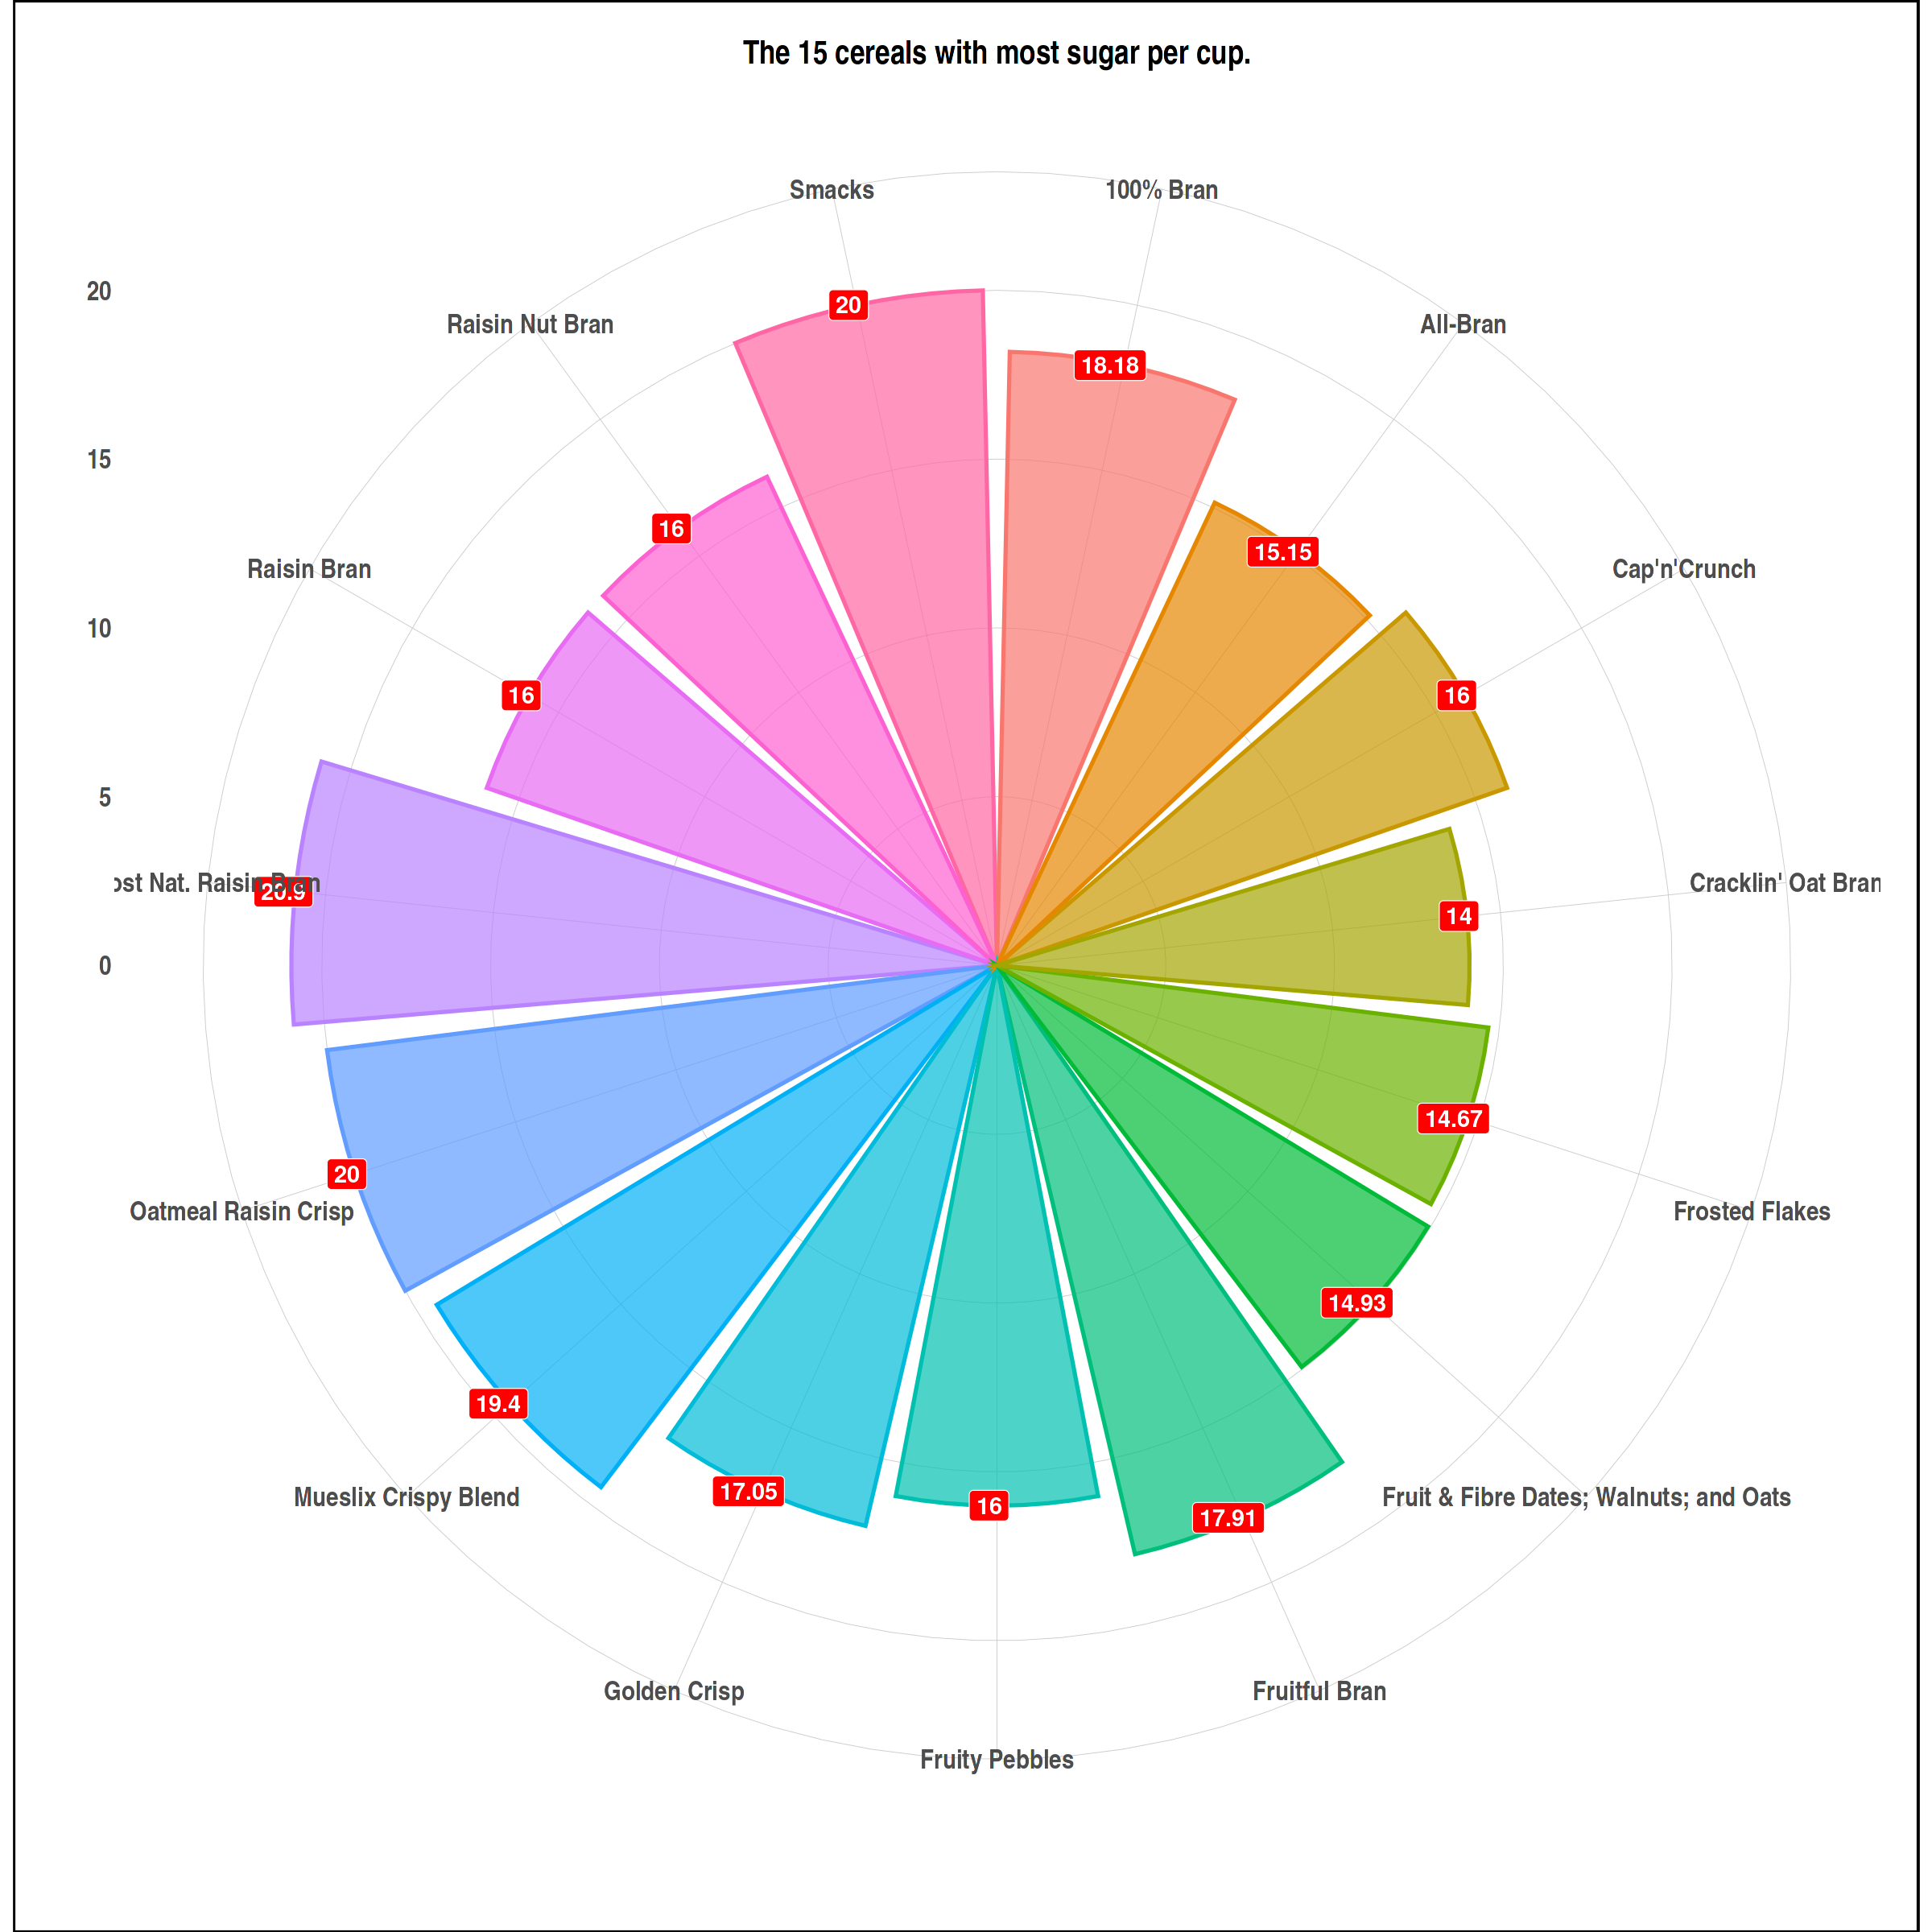

In [29]:
plot(top_sugar+ coord_polar())

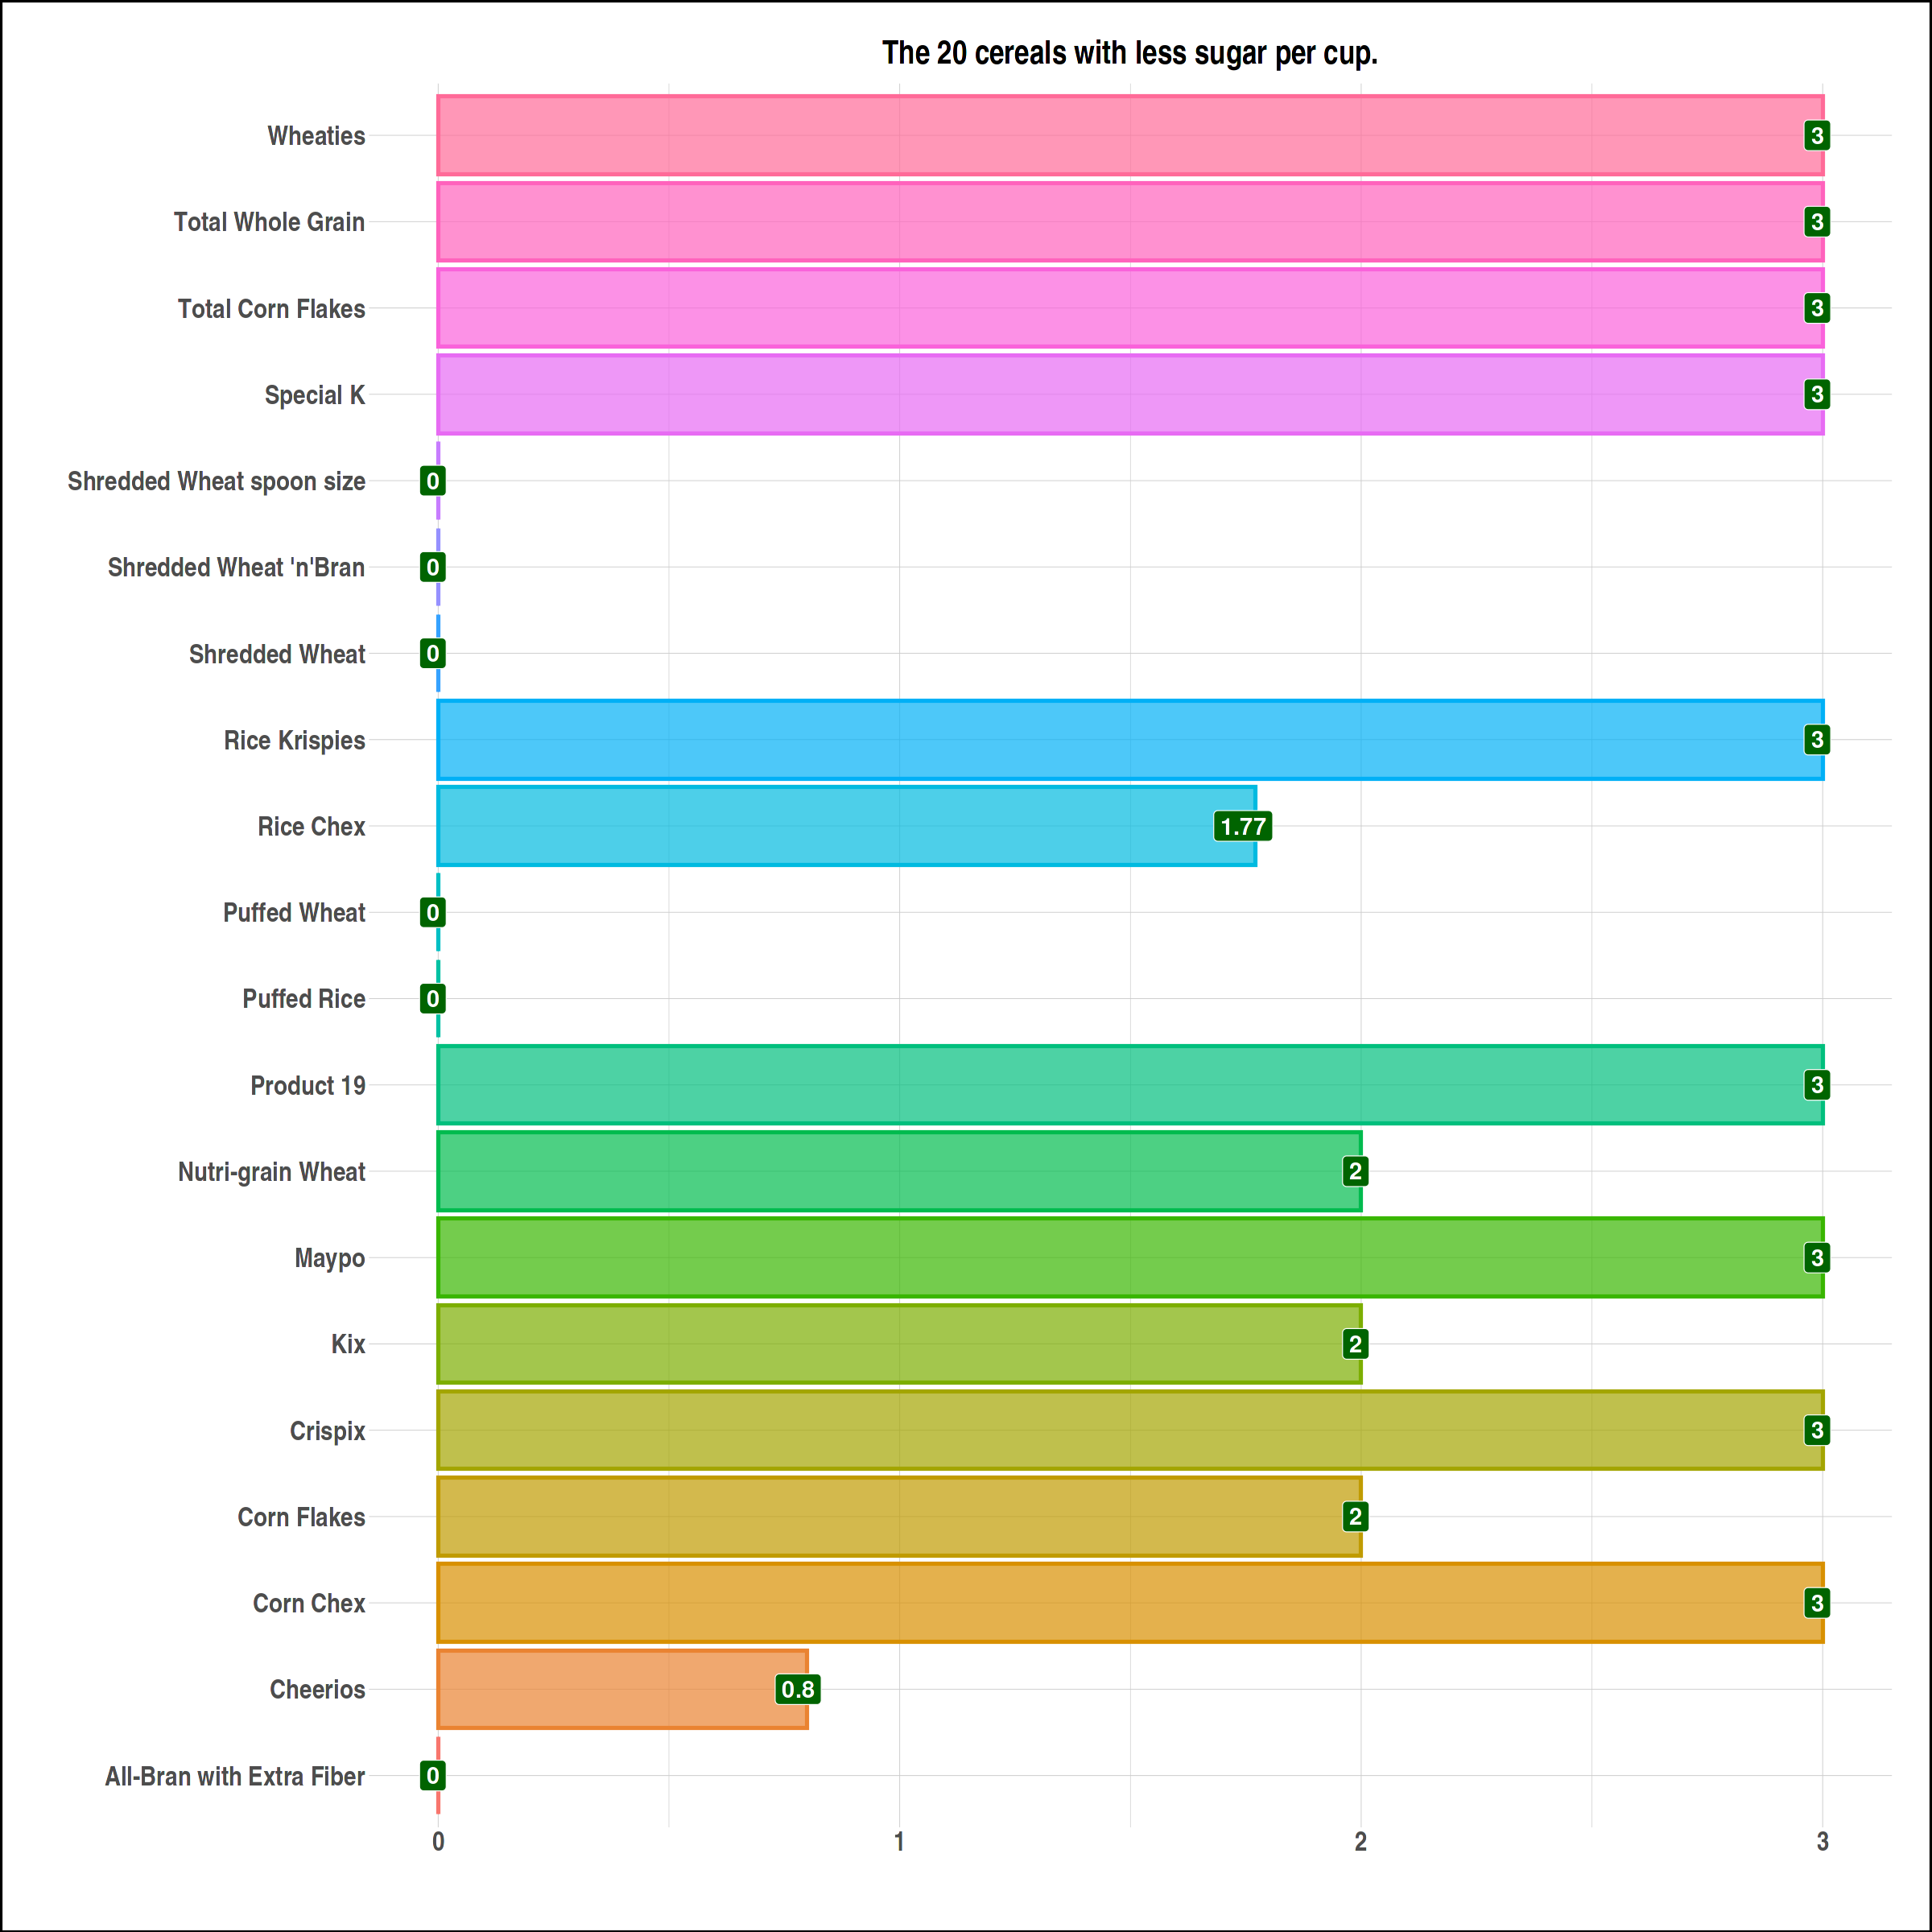

In [30]:
plot(bottom_sugar)

In [31]:
cheerios <- serving_onecup[serving_onecup$cereal == "Cheerios",]
cheerios <- as.data.frame(t(cheerios[,-1]))
names(cheerios)[1]<-paste("cheerios")
cheerios

cheerios
calories 88.0    
protein   4.8    
fat       1.6    
carbo    13.6    
fiber     1.6    
sugars    0.8    
potass   84.0    
vitamins 20.0

In [32]:
allbran <- serving_onecup[serving_onecup$cereal == "All-Bran",]
allbran <- as.data.frame(t(allbran[,-1]))
names(allbran)[1]<-paste("AllBran")
allbran

AllBran
calories 212.12 
protein   12.12 
fat        3.03 
carbo     21.21 
fiber     27.27 
sugars    15.15 
potass   969.70 
vitamins  75.76

In [33]:
options(repr.plot.width = 20, repr.plot.height = 10)

df <- cheerios
Cheerios <- ggplot(data = df, mapping = aes(x = row.names(df), y = cheerios)) +
         geom_segment(aes(xend=row.names(df), yend=0, color = row.names(df)), size = 2, alpha = .5) +
         geom_point(mapping = aes(fill = row.names(df)), size = 4, shape = 21) +
         coord_flip() +
         theme_economist() +
         ggtitle("Cheerios - Nutrition facts") +
         xlab("") +
         ylab("") +
         theme(plot.background = element_rect(fill = "#F8F8FF", color = "purple"),
               axis.title.x = element_text(size = 13, face = "italic"),
               axis.title.y = element_text(size = 13,face = "italic"),
               axis.text.x = element_text(size = 13, face = "bold"),
               axis.text.y = element_text(size = 13, face = "bold"),
               legend.position = "none")

df1 <- allbran
AllBran <- ggplot(data = df1, mapping = aes(x = row.names(df1), y = AllBran)) +
         geom_segment(aes(xend=row.names(df1), yend=0, color = row.names(df1)), size = 2, alpha = .5) +
         geom_point(mapping = aes(fill = row.names(df1)), size = 4, shape = 21) +
         coord_flip() +
         theme_economist() +
         ggtitle("All-Bran - nutrition facts") +
         xlab("") +
         ylab("") +
         theme(plot.background = element_rect(fill = "#F8F8FF", color = "purple"),
               axis.title.x = element_text(size = 13, face = "italic"),
               axis.title.y = element_text(size = 13,face = "italic"),
               axis.text.x = element_text(size = 13, face = "bold"),
               axis.text.y = element_text(size = 13, face = "bold"),
               legend.position = "none")

## 🥣 Cheerios 🔍 Nutrition facts

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


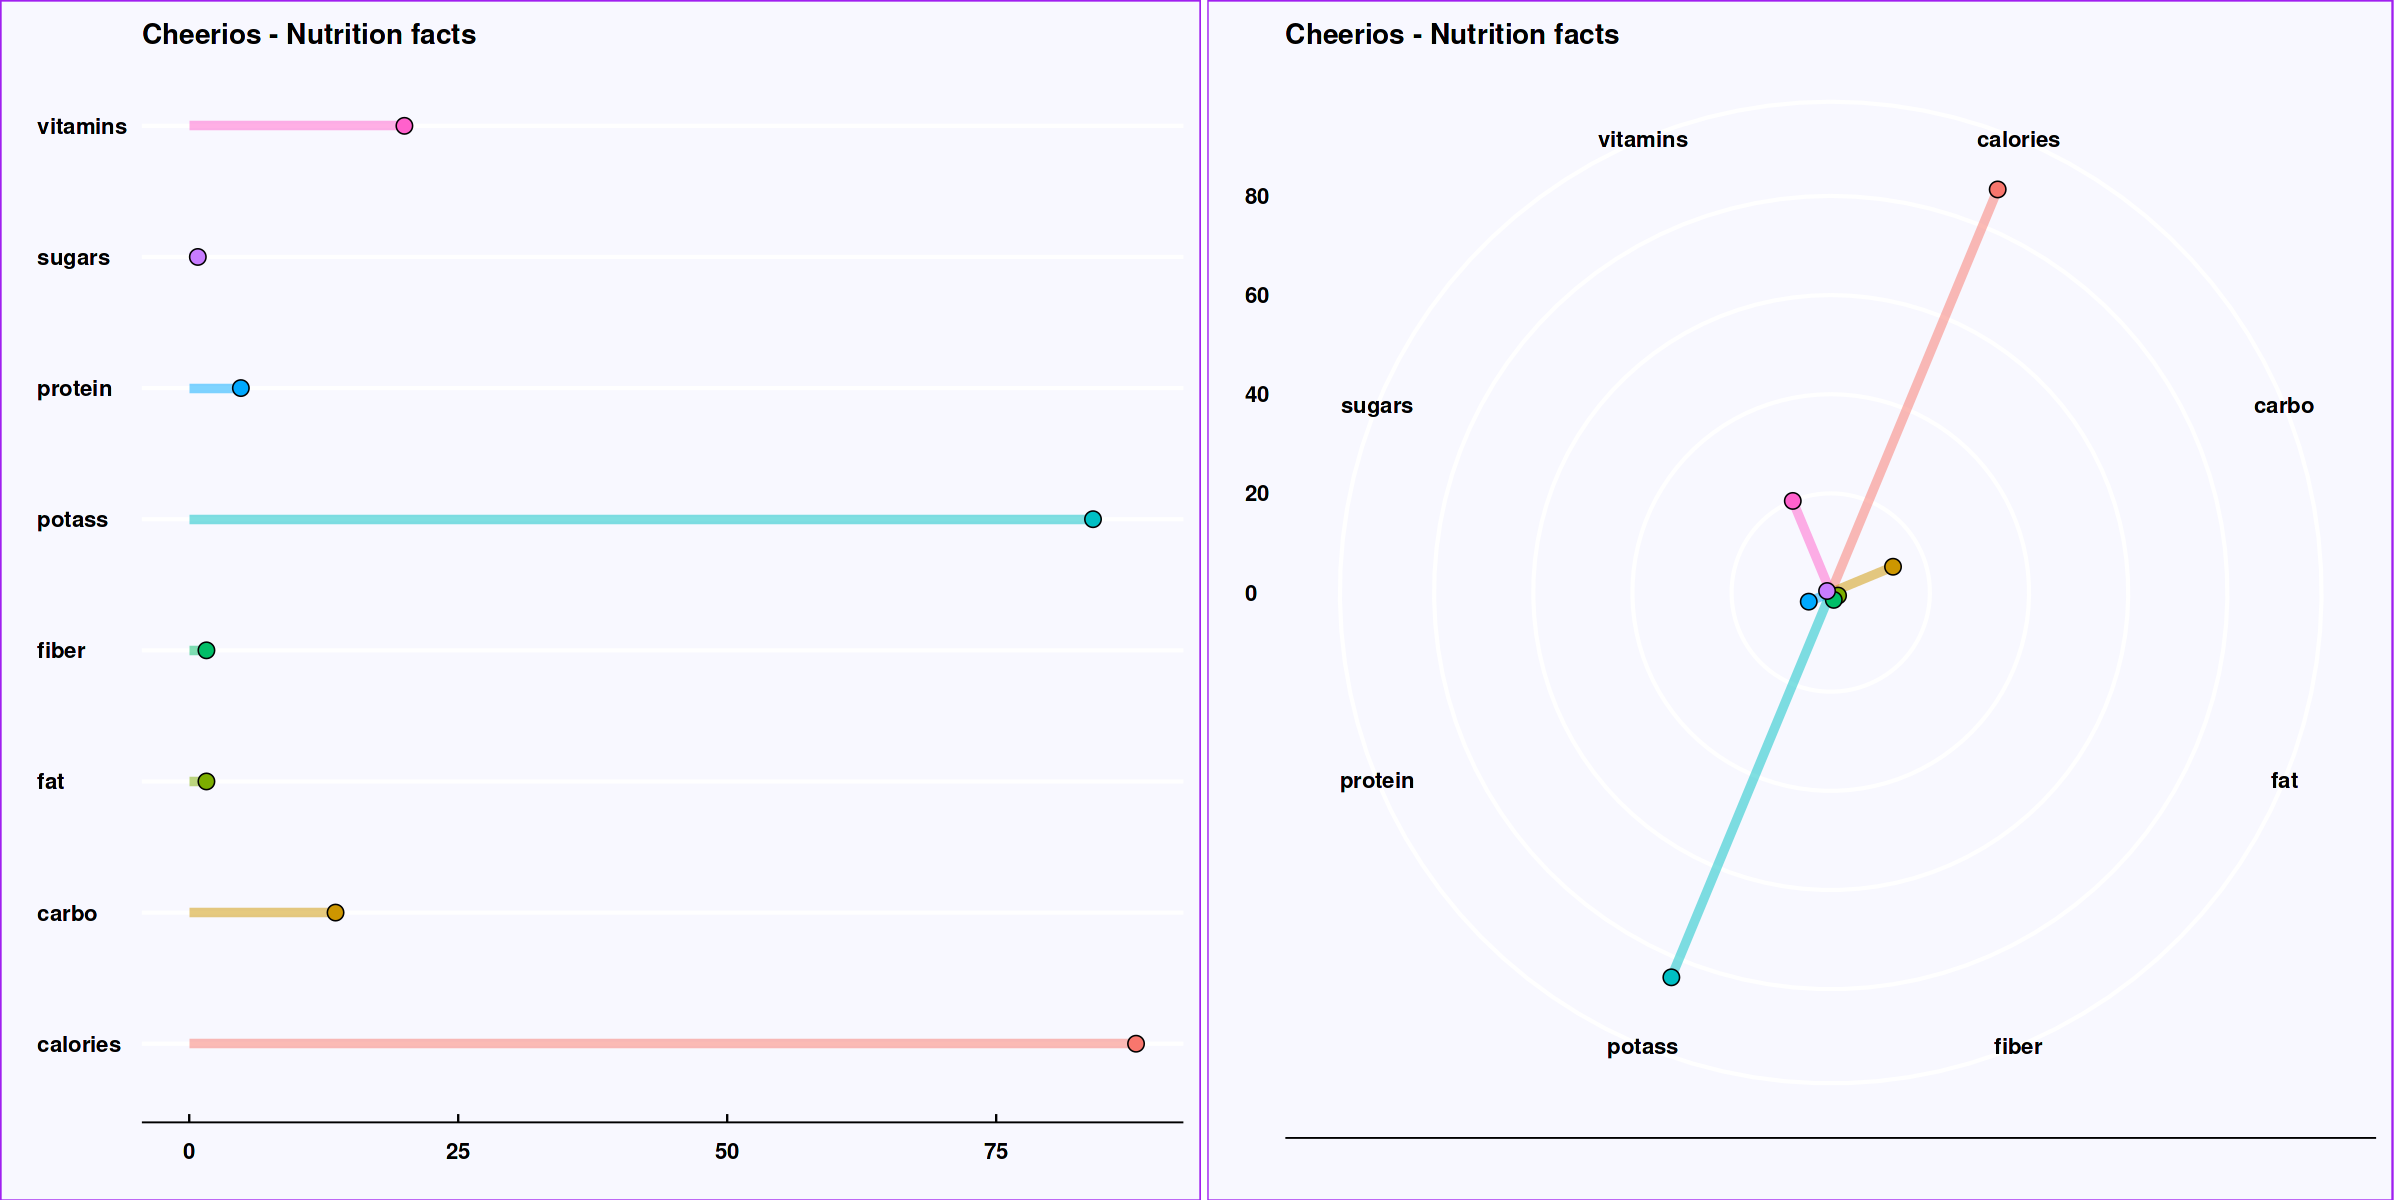

In [34]:
plot_grid(Cheerios, Cheerios + coord_polar() , ncol = 2, nrow = 1)

## 🥣 All-Bran 🔍 Nutrition facts

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


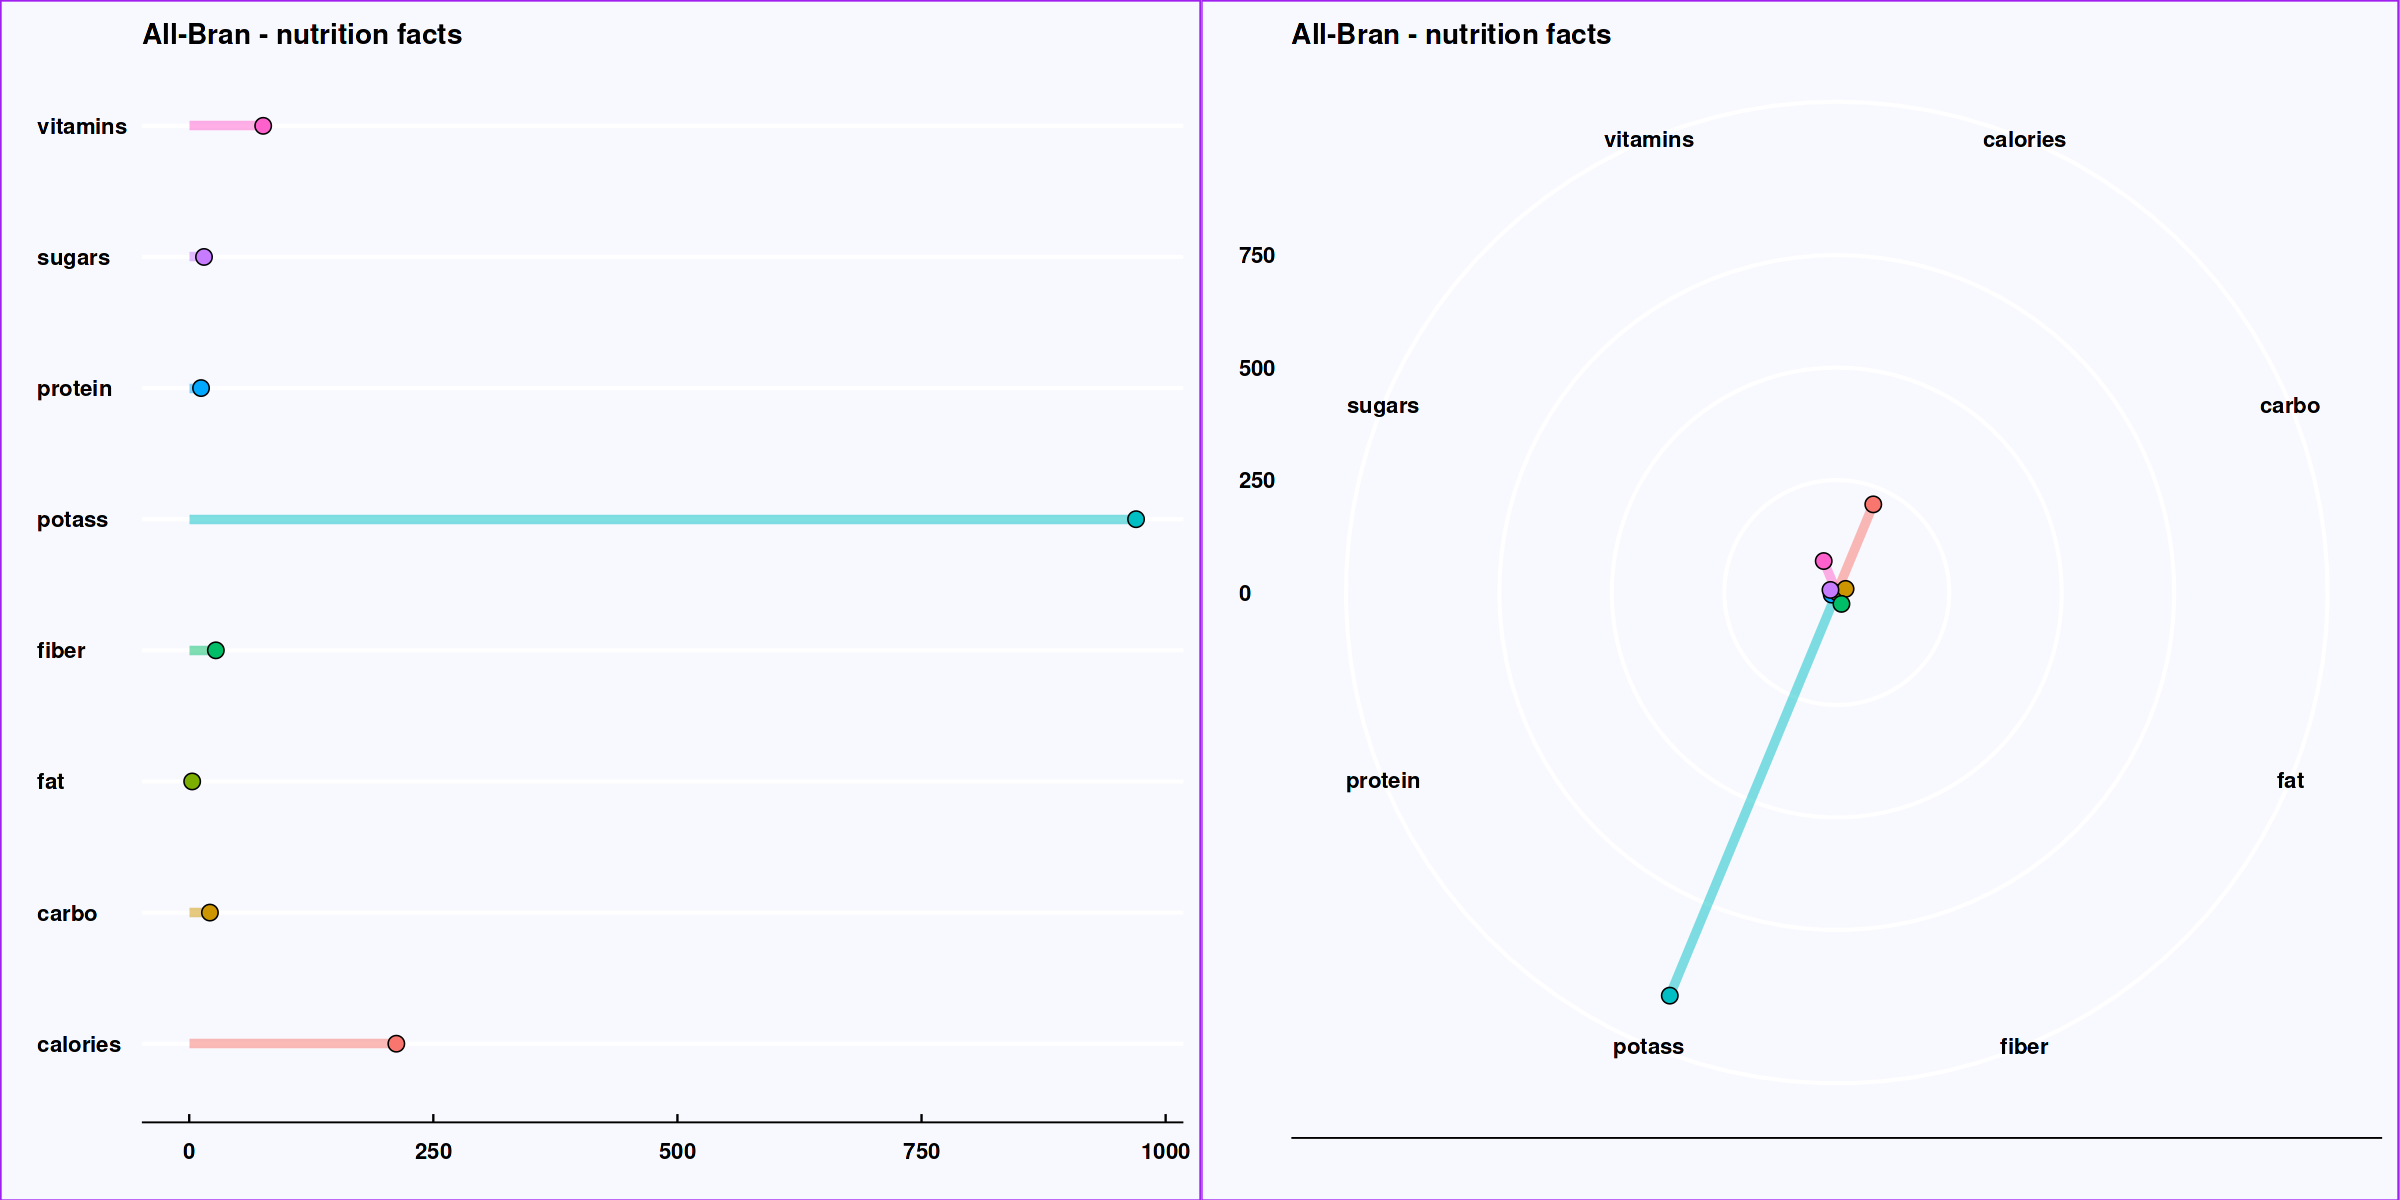

In [35]:
plot_grid(AllBran, AllBran + coord_polar(), ncol = 2, nrow = 1)

# Observatios

If the facs look shoking it's because I decide to change the portion to a **cup**.

* If you have any suggestions please let me know.

*have a nice day* 😉

# My others notebooks

* **R**: https://www.kaggle.com/code/alejandravillarreal/isic-skin-cancer-eda#Libraries
* **Python**: https://www.kaggle.com/code/alejandravillarreal/arc-applying-algebra-to-eda